### Import the necessary libraries Machine Learning project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.formula.api import ols
#import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
sns.set_palette('deep')
sns.set(color_codes='True')

# Problem 1

## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.


## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
#import the dataset and check first 5 records
df = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [3]:
# Lets remove the first serial number column
df.drop('Unnamed: 0',axis = 1, inplace=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [4]:
# Lets replace the '.' in column names with '_'
df.columns = df.columns.str.replace(".","_",regex=False)
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
# concise data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political_knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
# Find the categorical column unique values
for i in df.columns:
    if df[i].dtype in ['object']:
        print ( i, ':',df[i].sort_values().unique())

vote : ['Conservative' 'Labour']
gender : ['female' 'male']


In [7]:
# Check for null values
print('Number of null values: {}'.format(df.isnull().sum().sum()))

Number of null values: 0


In [8]:
# Check for duplicates
print('Number of duplicate rows: {}'.format(df.duplicated().sum()))

Number of duplicate rows: 8


In [9]:
# Lets see the duplicate rows
df[df.duplicated()].sort_values(by='age')

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
1244,Labour,29,4,4,4,2,2,2,female
67,Labour,35,4,4,5,2,3,2,male
1236,Labour,36,3,3,2,2,6,2,female
870,Labour,38,2,4,2,2,4,3,male
626,Labour,39,3,4,4,2,5,2,male
1438,Labour,40,4,3,4,2,2,2,male
1154,Conservative,53,3,4,2,2,6,0,female
983,Conservative,74,4,3,2,4,8,2,female


In [10]:
# Data summary of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political_knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [11]:
# Data summary of categorical columns
df.describe(include=[object]).T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [12]:
# Skewness of the dataset
df.skew()

age                        0.144621
economic_cond_national    -0.240453
economic_cond_household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political_knowledge       -0.426838
dtype: float64

## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [13]:
# Lets calculate range IQR and Quartile min and Quartile max of cotinuous variables into a dataset
df_desc = df.describe().T
df_desc['Range'] = 0
df_desc['IQR'] = 0
df_desc['Qmin'] = 0
df_desc['Qmax'] = 0
for ind in df_desc.index:
    df_desc.loc[ind,'Range'] = df_desc['max'][ind] - df_desc['min'][ind]
    df_desc.loc[ind,'IQR'] = df_desc['75%'][ind] - df_desc['25%'][ind]
    IQR_mult = np.where(df_desc['50%'][ind] == df_desc['25%'][ind],1,1.5)
    df_desc.loc[ind,'Qmin'] = np.where((df_desc['25%'][ind] - IQR_mult * df_desc['IQR'][ind]) < df_desc['min'][ind],df_desc['min'][ind],(df_desc['25%'][ind] - IQR_mult * df_desc['IQR'][ind]))
    df_desc.loc[ind,'Qmax'] = np.where((df_desc['75%'][ind] + IQR_mult * df_desc['IQR'][ind]) > df_desc['max'][ind],df_desc['max'][ind],(df_desc['75%'][ind] + IQR_mult * df_desc['IQR'][ind]))
df_desc

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0,69.0,26.0,24.0,93.0
economic_cond_national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0,4.0,1.0,2.0,5.0
economic_cond_household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0,4.0,1.0,2.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0,4.0,2.0,1.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0,4.0,2.0,1.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0,10.0,6.0,1.0,11.0
political_knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0,3.0,2.0,0.0,3.0


### Univariate Analysis

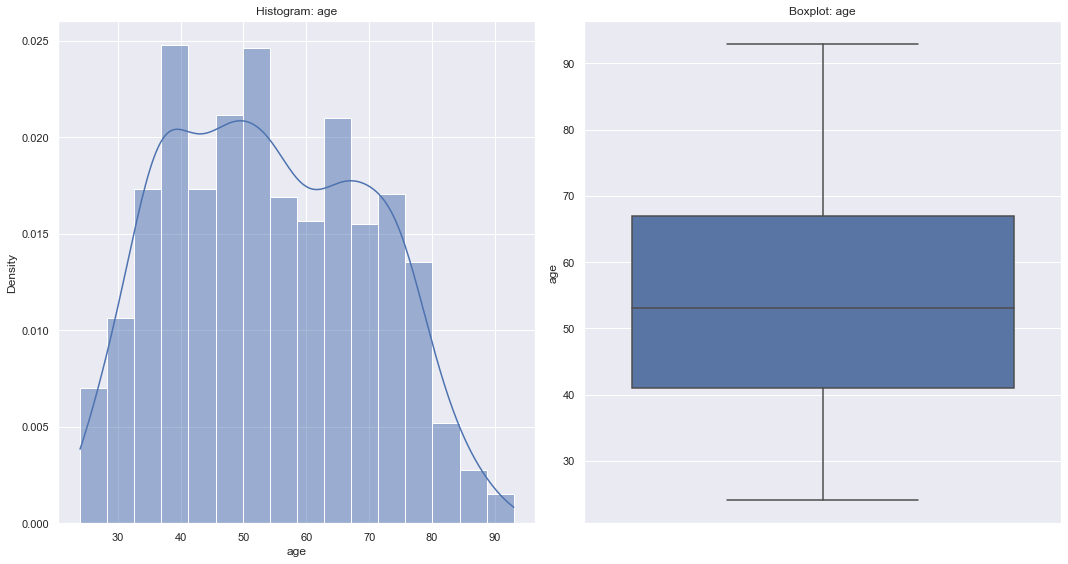

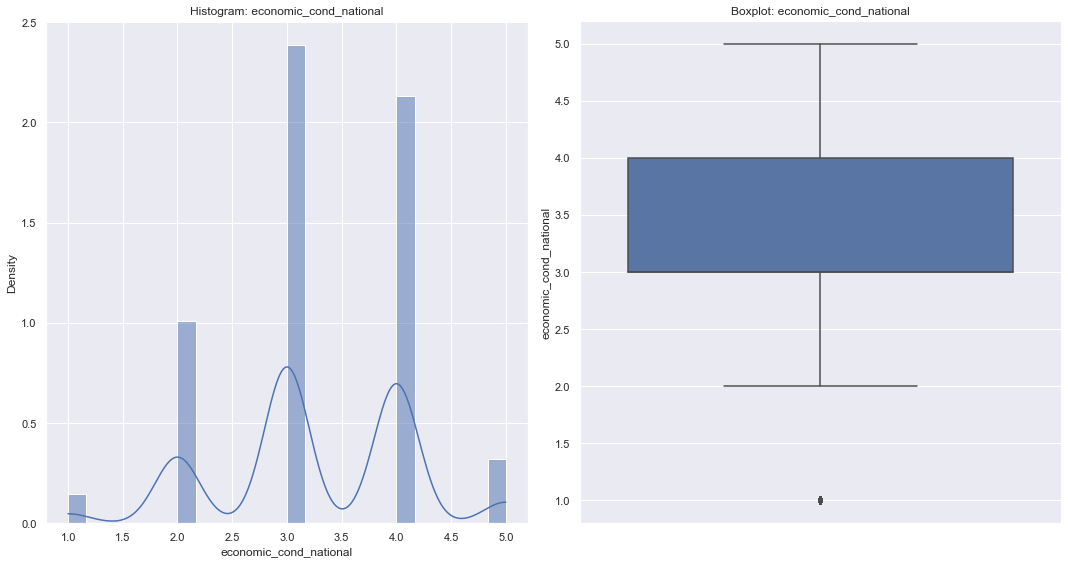

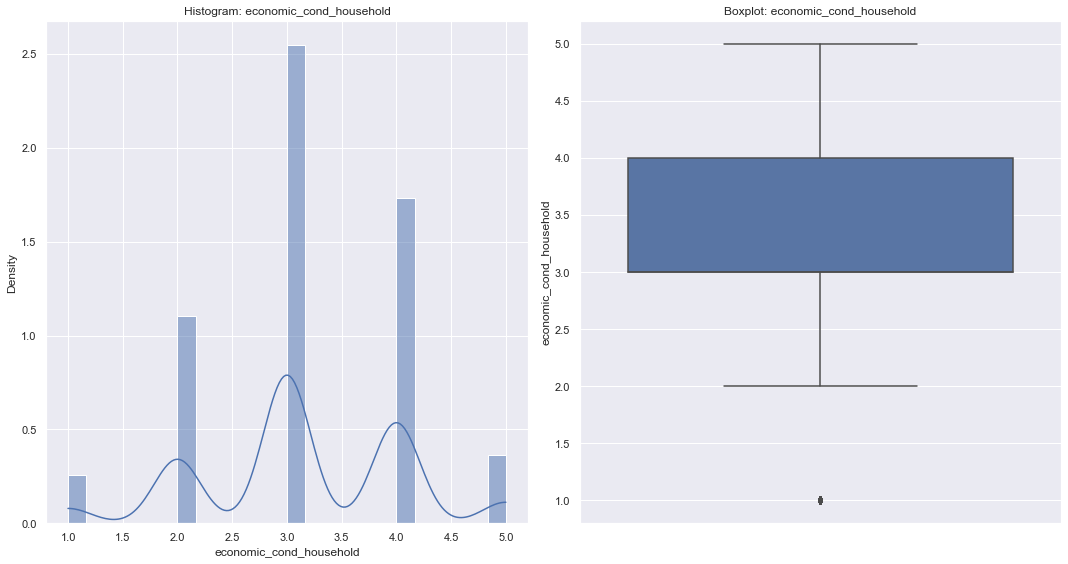

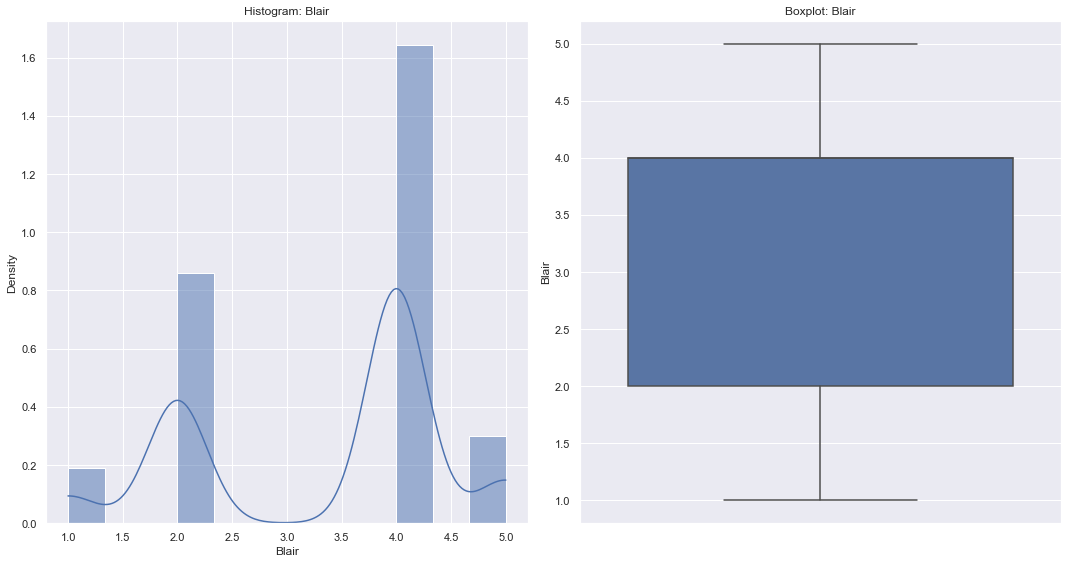

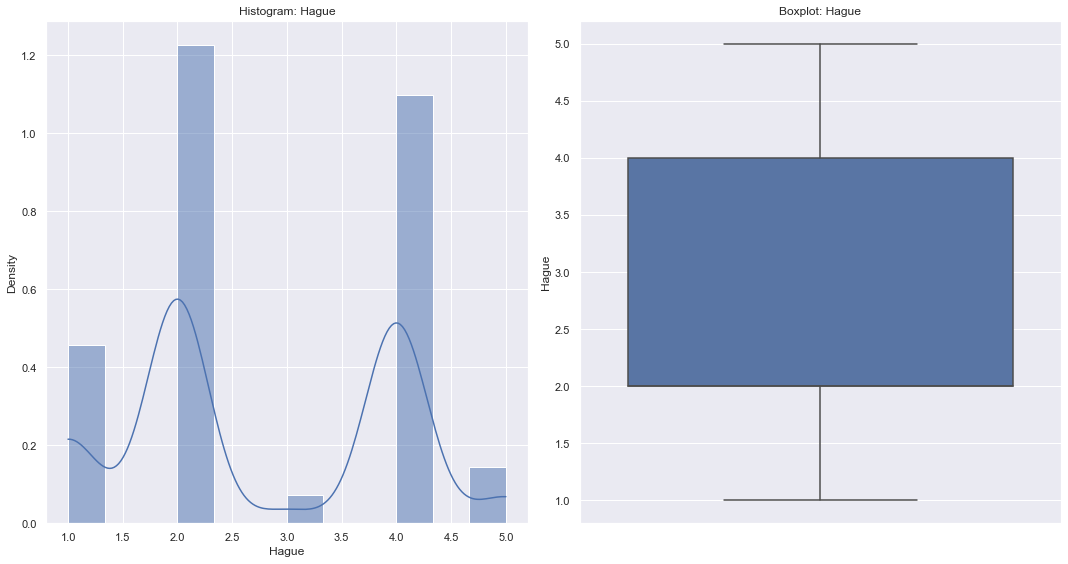

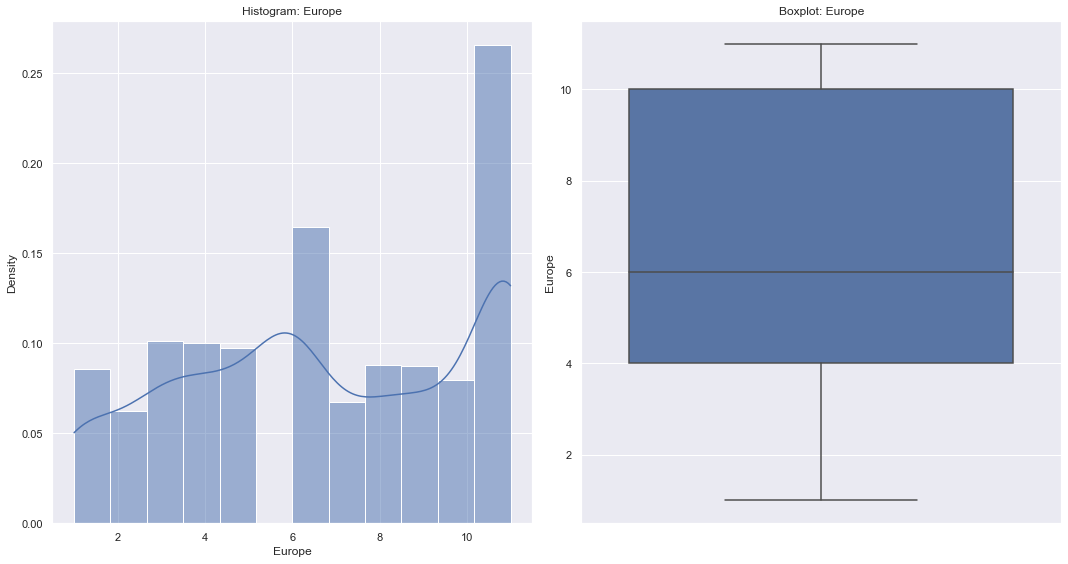

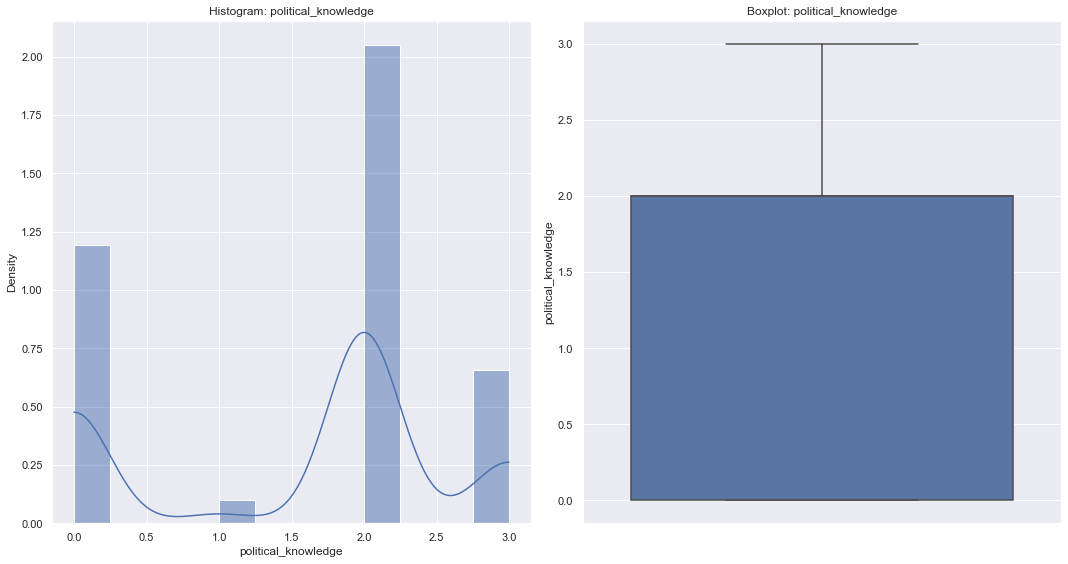

In [14]:
# Check the histogram and boxplot of the 7 numeric varaibles
for i in df.columns:
    if df[i].dtype not in ['object']:
        plt.figure(figsize = (15,8));
        plt.subplot(1,2,1);
        sns.histplot(x=df[i],kde=True,stat='density');
        plt.title('Histogram: {}'.format(i));
        plt.subplot(1,2,2);
        sns.boxplot(y=df[i],data=df);
        plt.title('Boxplot: {}'.format(i))                
        plt.tight_layout();

In [15]:
for i in df.columns:
    if df[i].dtype in ['object']:
        print ( i, ':')
        print(df[i].value_counts())
        print('------------------','\n','\n')

vote :
Labour          1063
Conservative     462
Name: vote, dtype: int64
------------------ 
 

gender :
female    812
male      713
Name: gender, dtype: int64
------------------ 
 



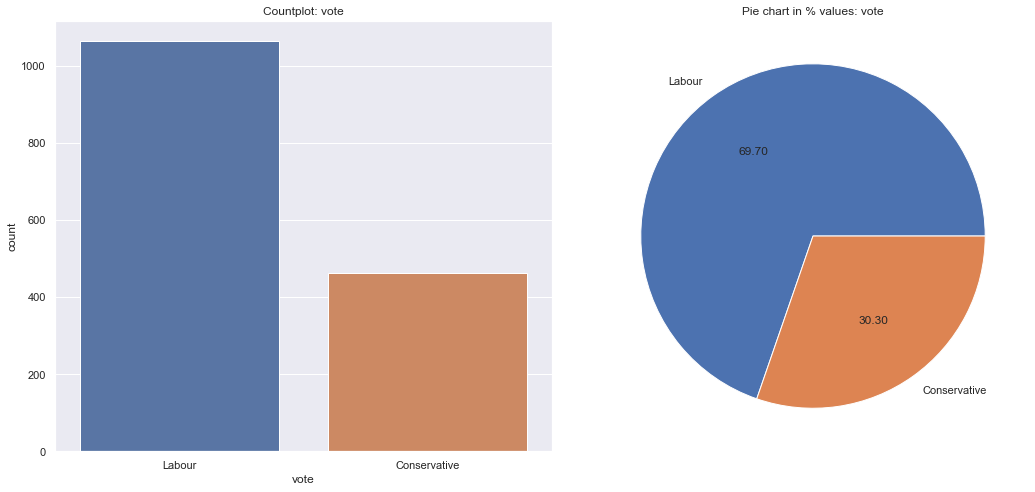

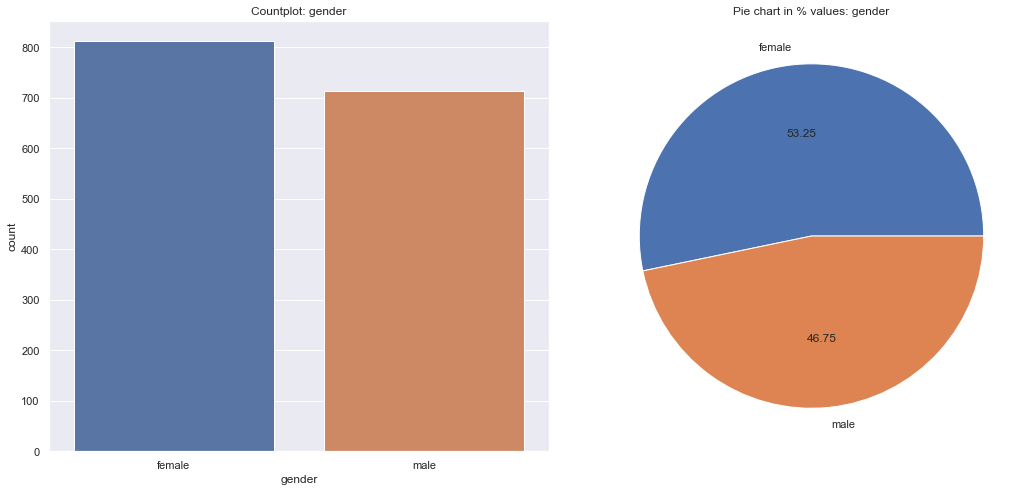

In [16]:
# countplot and piechart showing distribution of categories across the variable for object columns
for i in df.columns:
    if df[i].dtype in ['object']:
        plt.figure(figsize = (15,7))
        plt.subplot(1,2,1)
        sns.countplot(x=df[i],order = df[i].value_counts().index);
        plt.title('Countplot: {}'.format(i));
        plt.subplot(1,2,2);
        plt.pie(x=df[i].value_counts(),labels = df[i].value_counts().index,autopct='%.2f')
        plt.title('Pie chart in % values: {}'.format(i))                
        plt.tight_layout();
        

### Bivariate/Multivariate Analysis

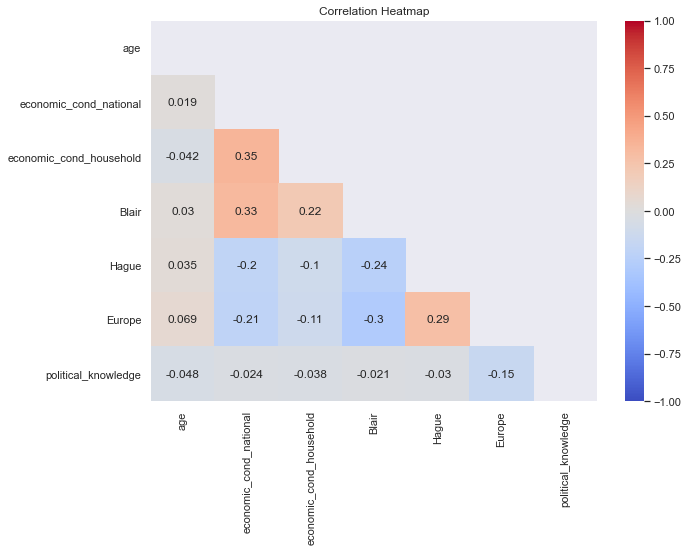

In [17]:
#Plot a heatmap of correlation between variables
plt.figure(figsize=(10,7))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
corr_tab = sns.heatmap(corr,annot=True,vmin=-1,vmax = 1,mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap');

In [18]:
# Outlier treatment - value counts
df['economic_cond_national'].value_counts(normalize=True)

3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: economic_cond_national, dtype: float64

In [19]:
df['economic_cond_household'].value_counts(normalize=True)

3    0.424918
4    0.288525
2    0.183607
5    0.060328
1    0.042623
Name: economic_cond_household, dtype: float64

<Figure size 1080x720 with 0 Axes>

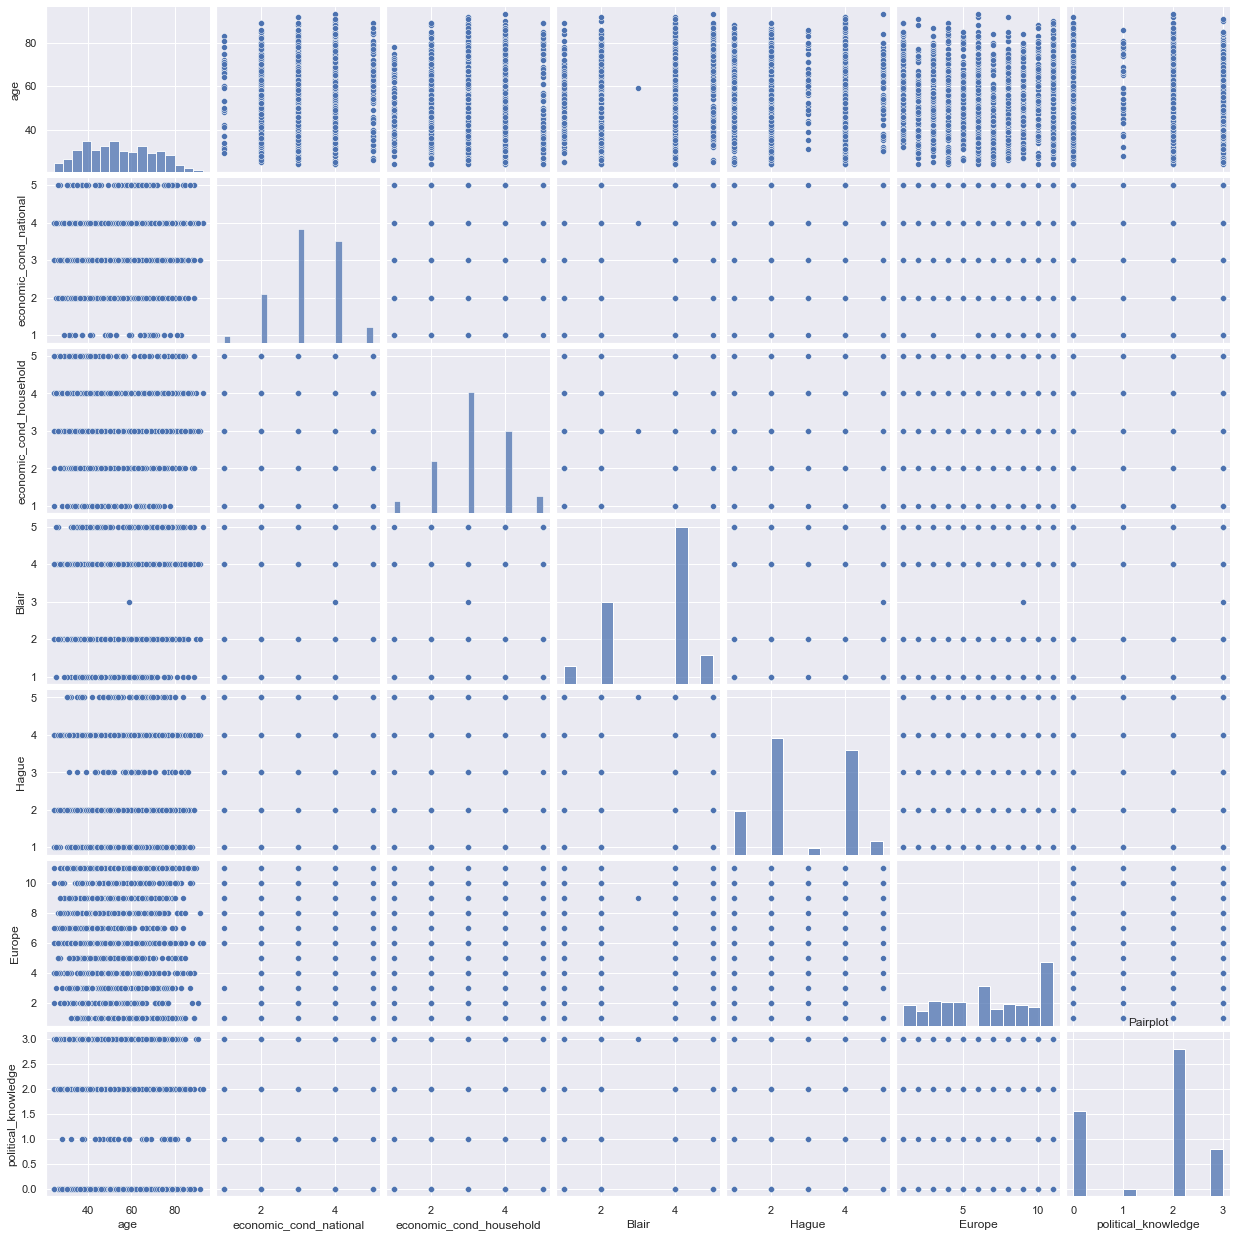

In [20]:
#Plot a pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df);
plt.title('Pairplot');

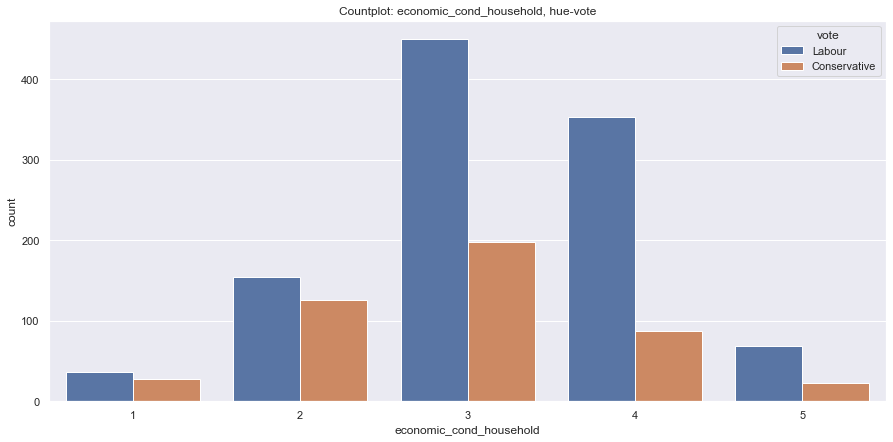

In [21]:
# Countplot of economic_cond_household with hue as vote
plt.figure(figsize = (15,7))
plt.title('Countplot: economic_cond_household, hue-vote');
sns.countplot(x='economic_cond_household',data = df,hue='vote');

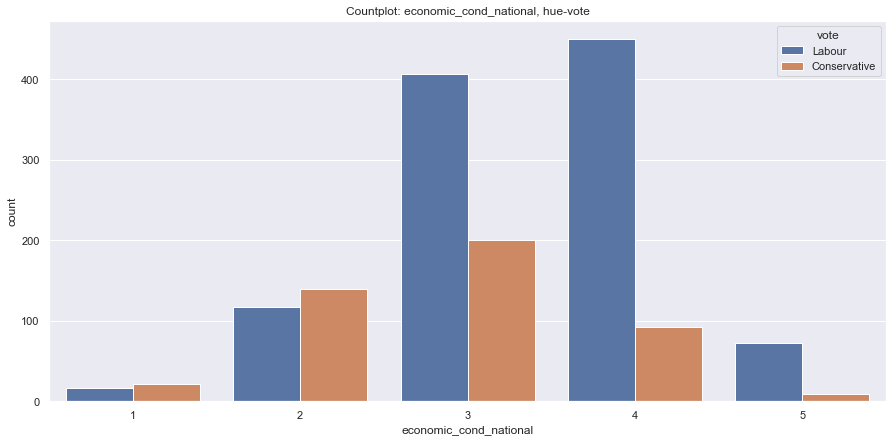

In [22]:
# Countplot of economic_cond_national with hue as vote
plt.figure(figsize = (15,7))
sns.countplot(x='economic_cond_national',data = df,hue='vote');
plt.title('Countplot: economic_cond_national, hue-vote');

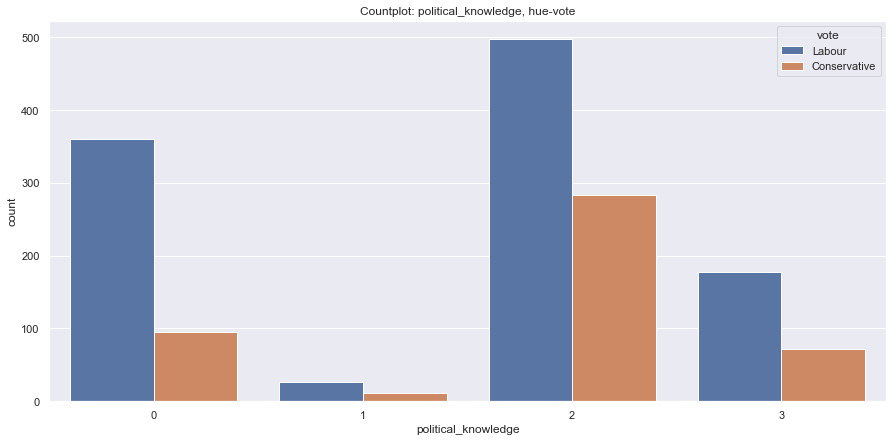

In [23]:
# Countplot of political_knowledge with hue as vote
plt.figure(figsize = (15,7))
plt.title('Countplot: political_knowledge, hue-vote');
sns.countplot(x='political_knowledge',data = df,hue='vote');

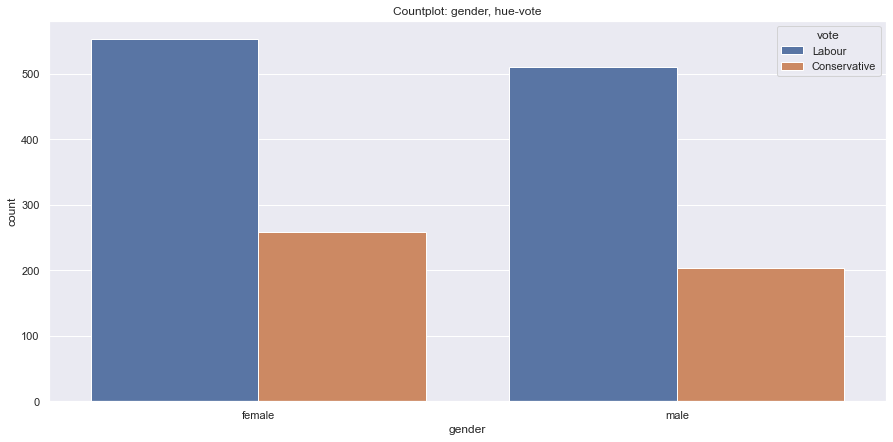

In [24]:
# Countplot of gender with hue as vote
plt.figure(figsize = (15,7))
plt.title('Countplot: gender, hue-vote');
sns.countplot(x='gender',data = df,hue='vote');

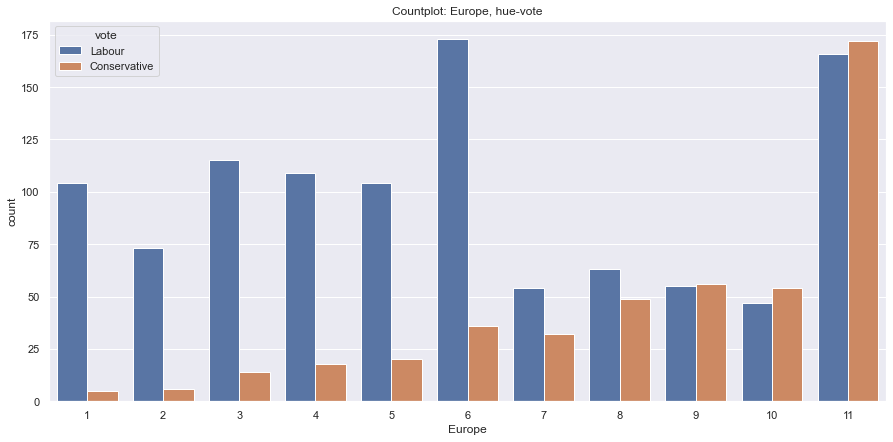

In [25]:
# Countplot of Europe with hue as vote
plt.figure(figsize = (15,7))
plt.title('Countplot: Europe, hue-vote');
sns.countplot(x='Europe',data = df,hue='vote');

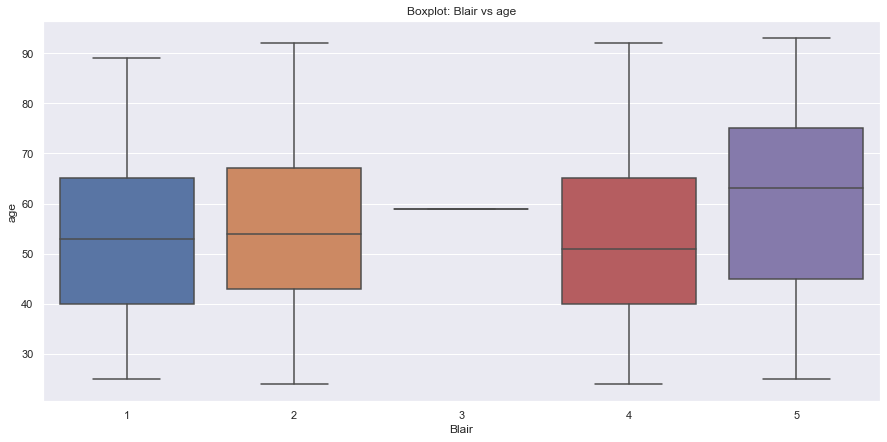

In [26]:
# Boxplot of Blair vs age
plt.figure(figsize = (15,7))
plt.title('Boxplot: Blair vs age');
sns.boxplot(x='Blair',y='age',data = df);

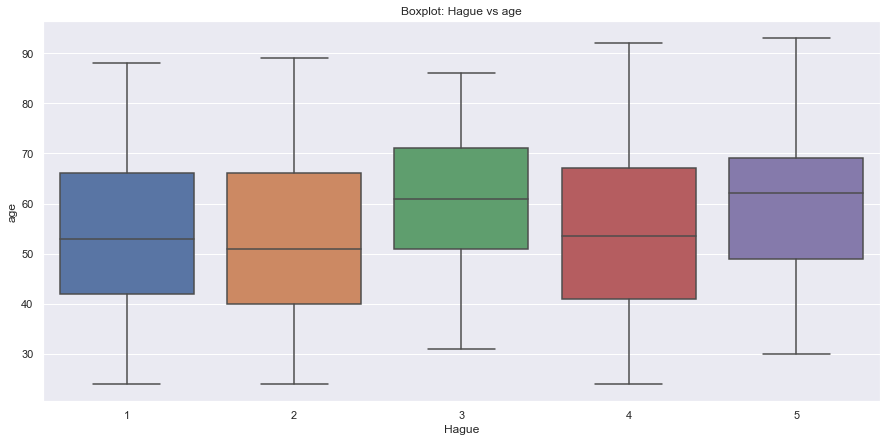

In [27]:
# Boxplot of Hague vs age
plt.figure(figsize = (15,7))
plt.title('Boxplot: Hague vs age');
sns.boxplot(x='Hague',y='age',data = df);

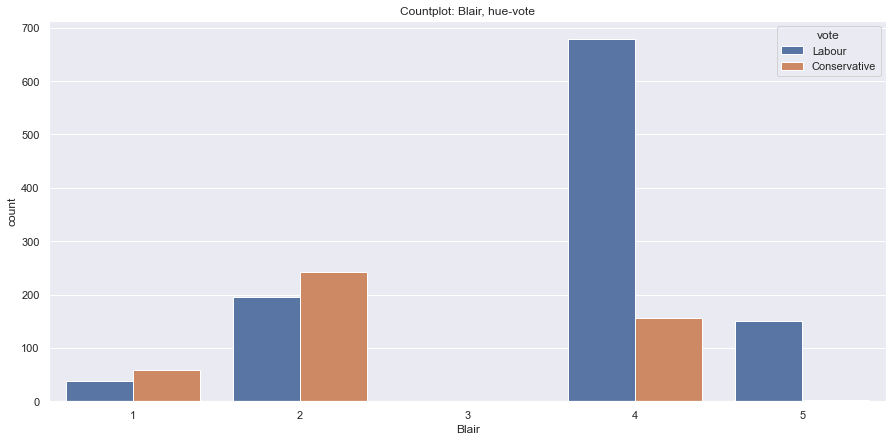

In [28]:
# Countplot of Blair with hue as vote
plt.figure(figsize = (15,7))
plt.title('Countplot: Blair, hue-vote');
sns.countplot(x='Blair',data = df,hue='vote');

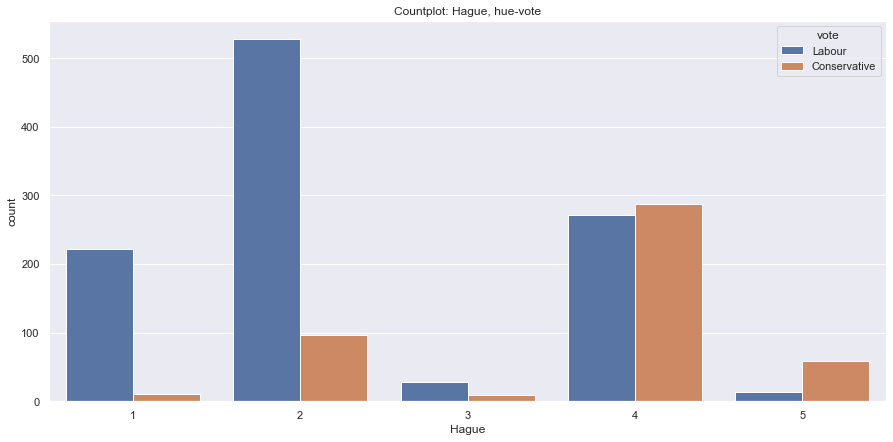

In [29]:
# Countplot of Hague with hue as vote
plt.figure(figsize = (15,7))
plt.title('Countplot: Hague, hue-vote');
sns.countplot(x='Hague',data = df,hue='vote');

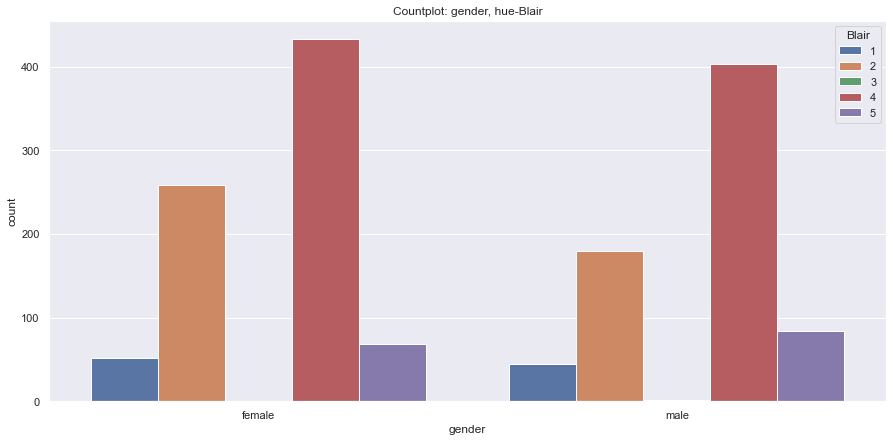

In [30]:
# Countplot of gender with Blair as hue
plt.figure(figsize = (15,7))
plt.title('Countplot: gender, hue-Blair');
sns.countplot(x='gender',data = df,hue='Blair');

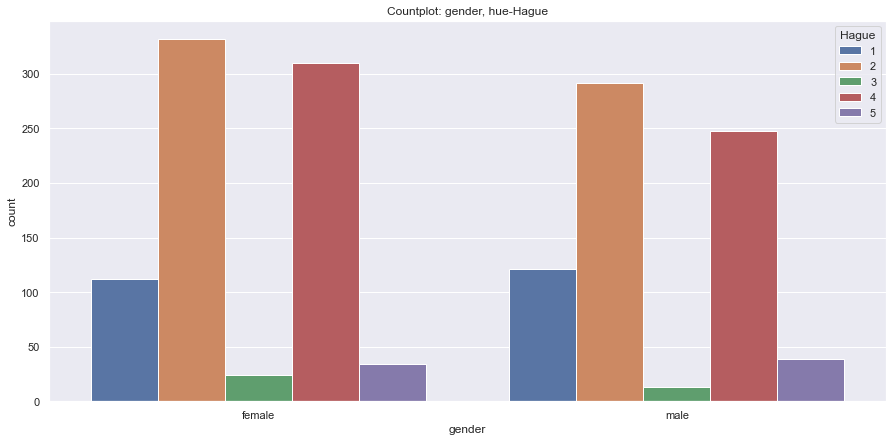

In [31]:
# Countplot of gender with Hague as hue
plt.figure(figsize = (15,7))
plt.title('Countplot: gender, hue-Hague');
sns.countplot(x='gender',data = df,hue='Hague');

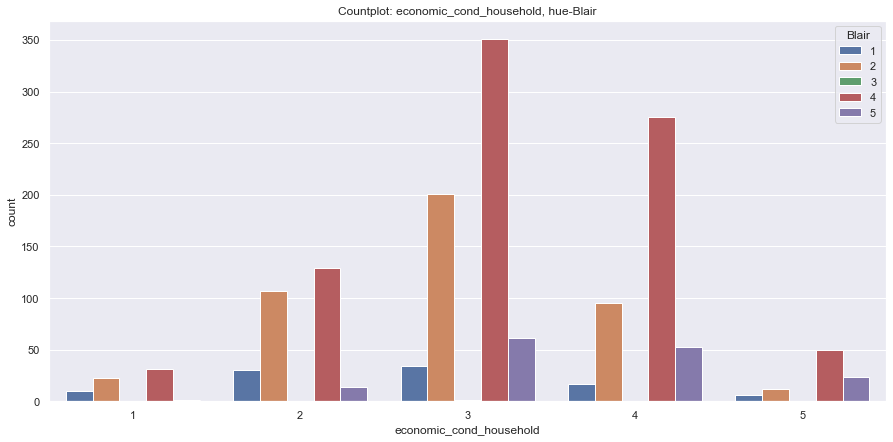

In [32]:
# Countplot of economic_cond_household with Blair as hue
plt.figure(figsize = (15,7))
plt.title('Countplot: economic_cond_household, hue-Blair');
sns.countplot(x='economic_cond_household',data = df,hue='Blair');

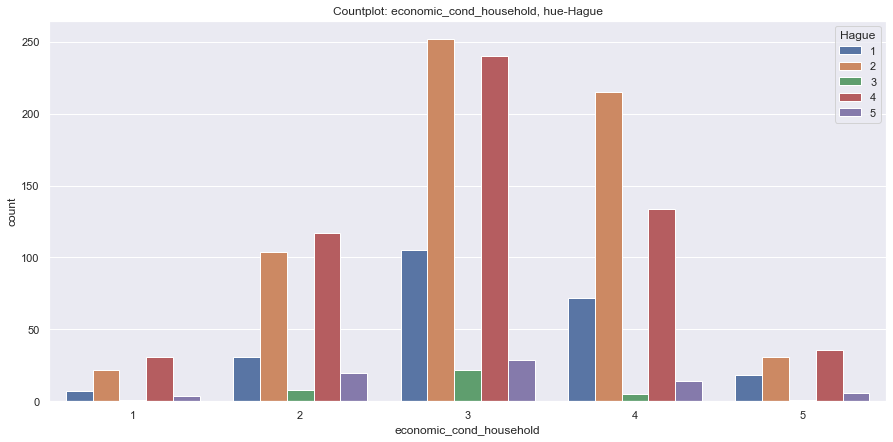

In [33]:
# Countplot of economic_cond_household with Hague as hue
plt.figure(figsize = (15,7))
plt.title('Countplot: economic_cond_household, hue-Hague');
sns.countplot(x='economic_cond_household',data = df,hue='Hague');

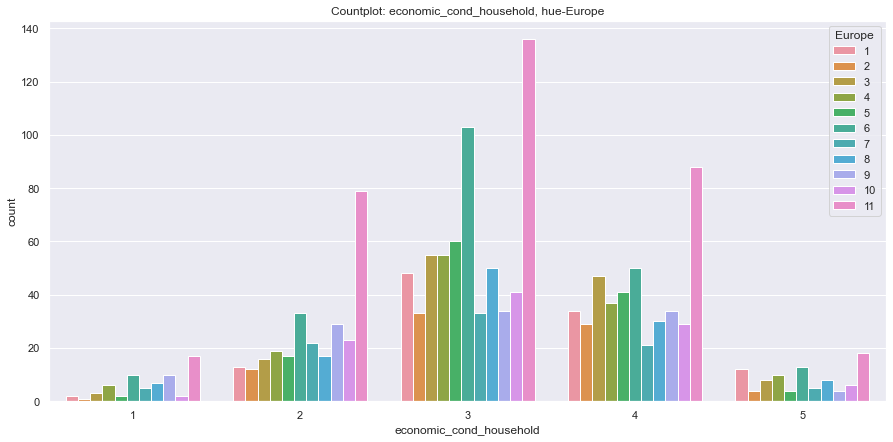

In [34]:
# Countplot of economic_cond_household with Europe as hue
plt.figure(figsize = (15,7))
plt.title('Countplot: economic_cond_household, hue-Europe');
sns.countplot(x='economic_cond_household',data = df,hue='Europe');

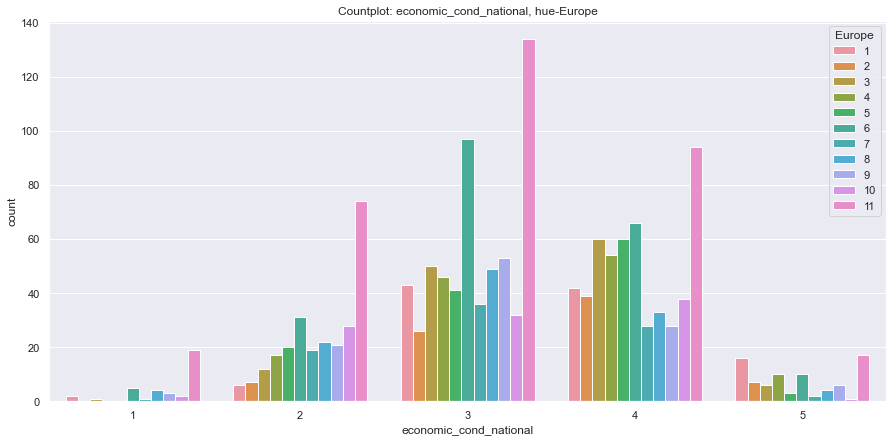

In [35]:
# Countplot of economic_cond_national with Europe as hue
plt.figure(figsize = (15,7))
plt.title('Countplot: economic_cond_national, hue-Europe');
sns.countplot(x='economic_cond_national',data = df,hue='Europe');

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [36]:
# Check the range of numeric columns
df_num = pd.DataFrame()
for i in df.columns:
    if df[i].dtype not in ['object']:
        df_num[i] = df[i]

for i in df_num.columns:
    print('Range of ',i ,'-',df[i].max() - df[i].min())

Range of  age - 69
Range of  economic_cond_national - 4
Range of  economic_cond_household - 4
Range of  Blair - 4
Range of  Hague - 4
Range of  Europe - 10
Range of  political_knowledge - 3


In [37]:
# Using standard scaler scale the numerical data and check the data summary
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num),columns = df_num.columns)
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,1.260922e-16,1.000328,-1.921698,-0.839313,-0.075276,0.816100,2.471512
economic_cond_national,1525.0,2.545141e-16,1.000328,-2.550189,-0.279218,-0.279218,0.856268,1.991754
economic_cond_household,1525.0,-4.551550e-16,1.000328,-2.302303,-0.150948,-0.150948,0.924730,2.000408
Blair,1525.0,4.322954e-16,1.000328,-1.987695,-1.136225,0.566716,0.566716,1.418187
Hague,1525.0,-1.560864e-16,1.000328,-1.419886,-0.607076,-0.607076,1.018544,1.831354
Europe,1525.0,-3.619691e-16,1.000328,-1.737782,-0.827714,-0.221002,0.992422,1.295778
political_knowledge,1525.0,-6.921968e-16,1.000328,-1.424148,-1.424148,0.422643,0.422643,1.346038


In [38]:
# Add the 2 categorical columns to this scaled dataset
for i in df.columns:
    if df[i].dtype in ['object']:
        df_scaled[i] = df[i]
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1525 non-null   float64
 1   economic_cond_national   1525 non-null   float64
 2   economic_cond_household  1525 non-null   float64
 3   Blair                    1525 non-null   float64
 4   Hague                    1525 non-null   float64
 5   Europe                   1525 non-null   float64
 6   political_knowledge      1525 non-null   float64
 7   vote                     1525 non-null   object 
 8   gender                   1525 non-null   object 
dtypes: float64(7), object(2)
memory usage: 107.4+ KB


In [39]:
df_scaled.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote,gender
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,Labour,female
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,Labour,male
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,Labour,male
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,Labour,female
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,Labour,male


In [40]:
# get dummy variables for the 2 categorical variables
df = pd.get_dummies(df_scaled,columns =['gender','vote'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1525 non-null   float64
 1   economic_cond_national   1525 non-null   float64
 2   economic_cond_household  1525 non-null   float64
 3   Blair                    1525 non-null   float64
 4   Hague                    1525 non-null   float64
 5   Europe                   1525 non-null   float64
 6   political_knowledge      1525 non-null   float64
 7   gender_male              1525 non-null   uint8  
 8   vote_Labour              1525 non-null   uint8  
dtypes: float64(7), uint8(2)
memory usage: 86.5 KB


In [41]:
df.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male,vote_Labour
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,0,1
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1,1
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1,1
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,0,1
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1,1


In [42]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = df.pop('vote_Labour')

# Apply train-test split in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [43]:
# Concise data summary of the training predictor dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 1453 to 1061
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1067 non-null   float64
 1   economic_cond_national   1067 non-null   float64
 2   economic_cond_household  1067 non-null   float64
 3   Blair                    1067 non-null   float64
 4   Hague                    1067 non-null   float64
 5   Europe                   1067 non-null   float64
 6   political_knowledge      1067 non-null   float64
 7   gender_male              1067 non-null   uint8  
dtypes: float64(7), uint8(1)
memory usage: 67.7 KB


In [44]:
# Concise data summary of the testing predictor dataset
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 91 to 776
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      458 non-null    float64
 1   economic_cond_national   458 non-null    float64
 2   economic_cond_household  458 non-null    float64
 3   Blair                    458 non-null    float64
 4   Hague                    458 non-null    float64
 5   Europe                   458 non-null    float64
 6   political_knowledge      458 non-null    float64
 7   gender_male              458 non-null    uint8  
dtypes: float64(7), uint8(1)
memory usage: 29.1 KB


In [45]:
# Check the number of records in train/test target variable
print(y_train.shape,y_test.shape)

(1067,) (458,)


In [46]:
# Check the value count in target variable of training set
print('Value counts (in %) of target variable in training dataset')
y_train.value_counts(normalize=True)

Value counts (in %) of target variable in training dataset


1    0.688847
0    0.311153
Name: vote_Labour, dtype: float64

In [47]:
# Check the value count in target variable of testing set
print('Value counts (in %) of target variable in testing dataset')
y_test.value_counts(normalize=True)

Value counts (in %) of target variable in testing dataset


1    0.716157
0    0.283843
Name: vote_Labour, dtype: float64

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

### Apply Logistic Regression

In [48]:
# Lets apply Logistic regression on the training model
lgr_model =LogisticRegression(solver = 'liblinear',penalty = 'l1',random_state = 1)
lgr_model.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=1, solver='liblinear')

In [49]:
# Let us first check Logistic regression performance on training set
print('The accuracy of Logistic regression model on training set is {}'.format(lgr_model.score(X_train,y_train)))

The accuracy of Logistic regression model on training set is 0.8406747891283973


In [50]:
# Let us check the confusion matrix for training data
y_train_predict = lgr_model.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 230                 102
Actual Positive                  68                 667


The ROC_AUC score for Logistic Regression model on training data is 0.889511105647078


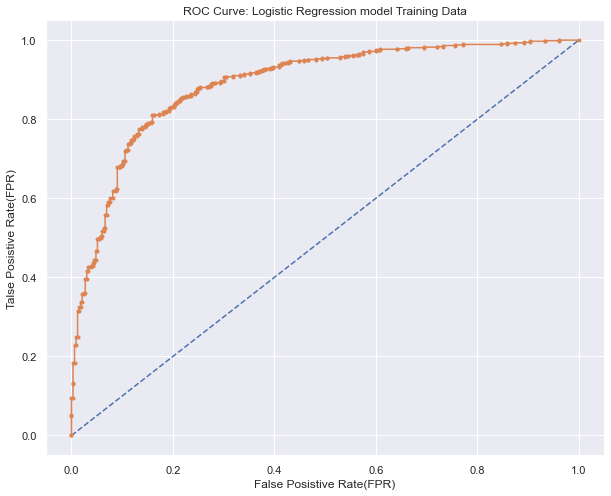

In [51]:
# Lets check the ROC_AUC score and ROC curve for traing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,lgr_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Logistic Regression model Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Logistic Regression model on training data is {}'.format(roc_auc_score(y_train,lgr_model.predict_proba(X_train)[:,1])))

In [52]:
# Lets check the classification report for logistic regression model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [53]:
# Store the classification report of training data for logistic regression Model into a dataframe
lgr_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
lgr_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.772,0.867,0.841,0.820,0.838
recall,0.693,0.907,0.841,0.800,0.841
f1-score,0.730,0.887,0.841,0.809,0.838
support,332.000,735.000,0.841,1067.000,1067.000


In [54]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lgr_train_metrics = [lgr_train_report.iloc[0,2], #accuracy
                    lgr_train_report.iloc[0,1], # precision 
                    lgr_train_report.iloc[1,1], # recall 
                    lgr_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,lgr_model.predict_proba(X_train)[:,1]),3)] # roc_auc_score
lgr_train_metrics

[0.841, 0.867, 0.907, 0.887, 0.89]

In [55]:
# Lets create a dataframe to compare test and training model metrics of Logistic Regression model.
model_comparison = pd.DataFrame(lgr_train_metrics,index = ['accuracy','precision','recall','f1-score','roc_auc_score'],
                            columns=['LGR_training'])
model_comparison['LGR_training'] = lgr_train_metrics
model_comparison

,LGR_training
accuracy,0.841
precision,0.867
recall,0.907
f1-score,0.887
roc_auc_score,0.890


In [56]:
# Let us first check Logistic regression performance on testing set
print('The accuracy of Logistic regression model on testing set is {}'.format(lgr_model.score(X_test,y_test)))

The accuracy of Logistic regression model on testing set is 0.8231441048034934


In [57]:
# Let us check the confusion matrix for testing data
y_test_predict = lgr_model.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  85                  45
Actual Positive                  36                 292


The ROC_AUC score for Logistic Regression model on testing data is 0.8828330206378986


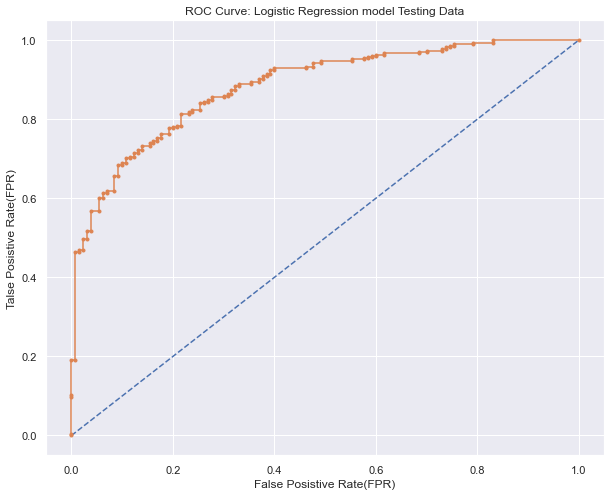

In [58]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,lgr_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Logistic Regression model Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Logistic Regression model on testing data is {}'.format(roc_auc_score(y_test,lgr_model.predict_proba(X_test)[:,1])))

In [59]:
# Lets check the classification report for logistic regression model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [60]:
# Store the classification report of testing data for logistic regression Model into a dataframe
lgr_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
lgr_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.702,0.866,0.823,0.784,0.820
recall,0.654,0.890,0.823,0.772,0.823
f1-score,0.677,0.878,0.823,0.778,0.821
support,130.000,328.000,0.823,458.000,458.000


In [61]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
lgr_test_metrics = [lgr_test_report.iloc[0,2], #accuracy
                    lgr_test_report.iloc[0,1], # precision 
                    lgr_test_report.iloc[1,1], # recall 
                    lgr_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test,lgr_model.predict_proba(X_test)[:,1]),3)] # roc_auc_score
lgr_test_metrics

[0.823, 0.866, 0.89, 0.878, 0.883]

In [62]:
# Lets store test model metrics of Logistic Regression model.

model_comparison['LGR_test'] = lgr_test_metrics
model_comparison

,LGR_training,LGR_test
accuracy,0.841,0.823
precision,0.867,0.866
recall,0.907,0.890
f1-score,0.887,0.878
roc_auc_score,0.890,0.883


### Apply Linear Discriminant Analysis

In [63]:
# Lets apply Linear Discriminant Analysis on the training model
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,y_train)

In [64]:
# Let us first check LDA performance on training set
print('The accuracy of LDA model on training set is {}'.format(lda_model.score(X_train,y_train)))

The accuracy of LDA model on training set is 0.8369259606373008


In [65]:
# Let us check the confusion matrix for training data
y_train_predict = lda_model.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 233                  99
Actual Positive                  75                 660


The ROC_AUC score for LDA model on training data is 0.8892242439144332


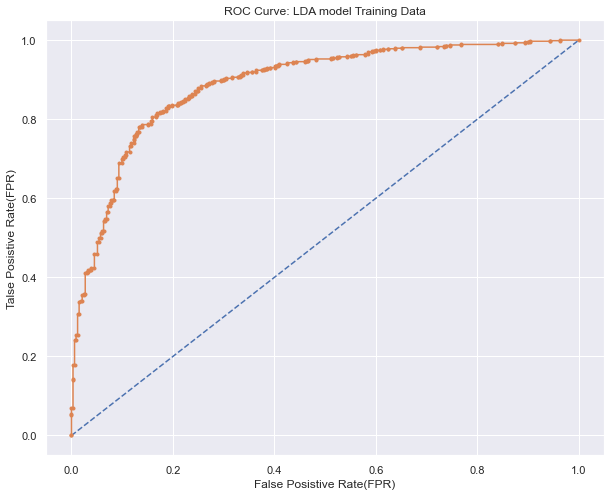

In [66]:
# Lets check the ROC_AUC score and ROC curve for training data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: LDA model Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LDA model on training data is {}'.format(roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1])))

In [67]:
# Lets check the classification report for LDA model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [68]:
# Store the classification report of training data for lDA Model into a dataframe
lda_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
lda_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.756,0.870,0.837,0.813,0.834
recall,0.702,0.898,0.837,0.800,0.837
f1-score,0.728,0.884,0.837,0.806,0.835
support,332.000,735.000,0.837,1067.000,1067.000


In [69]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lda_train_metrics = [lda_train_report.iloc[0,2], #accuracy
                    lda_train_report.iloc[0,1], # precision 
                    lda_train_report.iloc[1,1], # recall 
                    lda_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]),3)] # roc_auc_score
lda_train_metrics

[0.837, 0.87, 0.898, 0.884, 0.889]

In [70]:
# Lets create a dataframe to compare test and training model metrics of LDA model.

model_comparison['LDA_training'] = lda_train_metrics
model_comparison

,LGR_training,LGR_test,LDA_training
accuracy,0.841,0.823,0.837
precision,0.867,0.866,0.870
recall,0.907,0.890,0.898
f1-score,0.887,0.878,0.884
roc_auc_score,0.890,0.883,0.889


In [71]:
# Let us first check LDA performance on testing set
print('The accuracy of LDA model on testing set is {}'.format(lda_model.score(X_test,y_test)))

The accuracy of LDA model on testing set is 0.8187772925764192


In [72]:
# Let us check the confusion matrix for testing data
y_test_predict = lda_model.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  86                  44
Actual Positive                  39                 289


The ROC_AUC score for LDA model on testing data is 0.8837711069418386


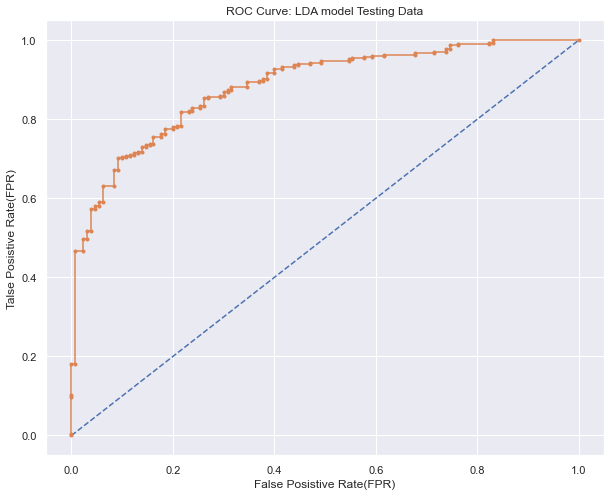

In [73]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: LDA model Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LDA model on testing data is {}'.format(roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1])))

In [74]:
# Lets check the classification report for lDA model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [75]:
# Store the classification report of testing data for LDA Model into a dataframe
lda_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
lda_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.688,0.868,0.819,0.778,0.817
recall,0.662,0.881,0.819,0.771,0.819
f1-score,0.675,0.874,0.819,0.774,0.818
support,130.000,328.000,0.819,458.000,458.000


In [76]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
lda_test_metrics = [lda_test_report.iloc[0,2], #accuracy
                    lda_test_report.iloc[0,1], # precision
                    lda_test_report.iloc[1,1], # recall 
                    lda_test_report.iloc[2,1], # f1-score
                     round(roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]),3)] # roc_auc_score
lda_test_metrics

[0.819, 0.868, 0.881, 0.874, 0.884]

In [77]:
# Lets create a dataframe to compare test and training model metrics of LDA model.

model_comparison['LDA_test'] = lda_test_metrics
model_comparison

,LGR_training,LGR_test,LDA_training,LDA_test
accuracy,0.841,0.823,0.837,0.819
precision,0.867,0.866,0.870,0.868
recall,0.907,0.890,0.898,0.881
f1-score,0.887,0.878,0.884,0.874
roc_auc_score,0.890,0.883,0.889,0.884


## 1.5	Apply KNN Model and Naïve Bayes Model. Interpret the results.

### Apply KNN model

In [78]:
# We will plot the misclassification error for different k values, ideal is square root of number of obeservations
mce = []
for k in np.arange(1,50,2):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    mce.append(1 - knn_model.score(X_test,y_test))

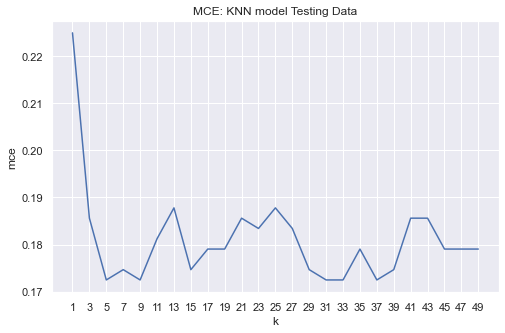

In [79]:
# Lets plot the mce value and choose the k value with lowest mce value
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,50,2),mce);
plt.xticks(np.arange(1,50,2));
plt.title('MCE: KNN model Testing Data');
plt.xlabel('k');
plt.ylabel('mce');

In [80]:
# Lets apply KNN model on the training model
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
# Let us first check KNN performance on training set
print('The accuracy of KNN model on training set is {}'.format(knn_model.score(X_train,y_train)))

The accuracy of KNN model on training set is 0.8622305529522024


In [82]:
# Let us check the confusion matrix for training data
y_train_predict = knn_model.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 245                  87
Actual Positive                  60                 675


The ROC_AUC score for KNN model on training data is 0.9300713056306861


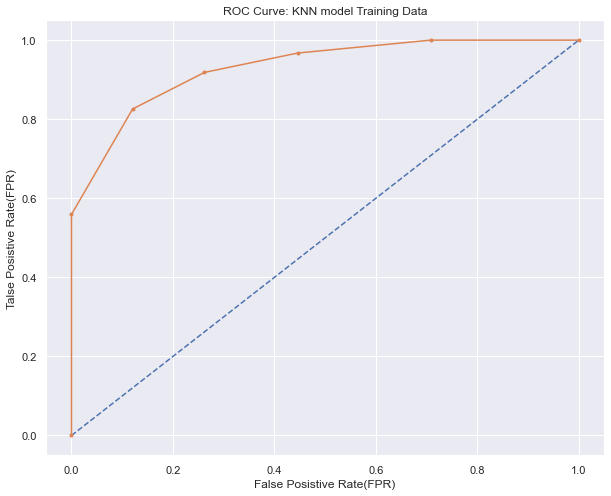

In [83]:
# Lets check the ROC_AUC score and ROC curve for training data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,knn_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: KNN model Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for KNN model on training data is {}'.format(roc_auc_score(y_train,knn_model.predict_proba(X_train)[:,1])))

In [84]:
# Lets check the classification report for KNN model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [85]:
# Store the classification report of training data for KNN Model into a dataframe
knn_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
knn_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.803,0.886,0.862,0.845,0.860
recall,0.738,0.918,0.862,0.828,0.862
f1-score,0.769,0.902,0.862,0.836,0.861
support,332.000,735.000,0.862,1067.000,1067.000


In [86]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
knn_train_metrics = [knn_train_report.iloc[0,2], #accuracy
                    knn_train_report.iloc[0,1], # precision 
                    knn_train_report.iloc[1,1], # recall 
                    knn_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,knn_model.predict_proba(X_train)[:,1]),3)] # roc_auc_score
knn_train_metrics

[0.862, 0.886, 0.918, 0.902, 0.93]

In [87]:
# Lets create a dataframe to compare test and training model metrics of KNN model.

model_comparison['KNN_training'] = knn_train_metrics
model_comparison

,LGR_training,LGR_test,LDA_training,LDA_test,KNN_training
accuracy,0.841,0.823,0.837,0.819,0.862
precision,0.867,0.866,0.870,0.868,0.886
recall,0.907,0.890,0.898,0.881,0.918
f1-score,0.887,0.878,0.884,0.874,0.902
roc_auc_score,0.890,0.883,0.889,0.884,0.930


In [88]:
# Let us first check KNN performance on testing set
print('The accuracy of KNN model on testing set is {}'.format(knn_model.score(X_test,y_test)))

The accuracy of KNN model on testing set is 0.8275109170305677


In [89]:
# Let us check the confusion matrix for testing data
y_test_predict = knn_model.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  90                  40
Actual Positive                  39                 289


The ROC_AUC score for KNN model on testing data is 0.8678939962476547


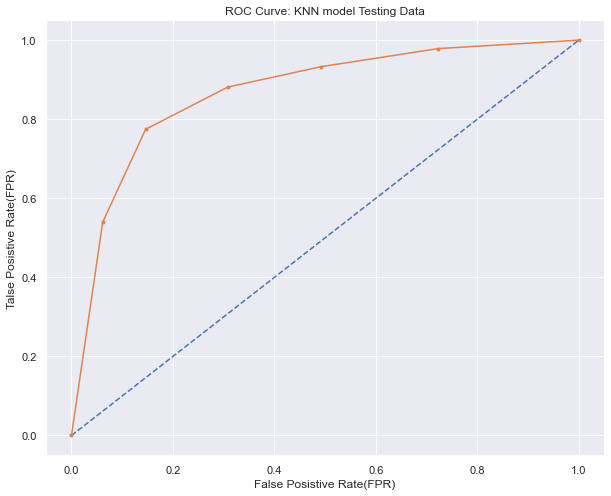

In [90]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,knn_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: KNN model Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for KNN model on testing data is {}'.format(roc_auc_score(y_test,knn_model.predict_proba(X_test)[:,1])))

In [91]:
# Lets check the classification report for KNN model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [92]:
# Store the classification report of testing data for KNN Model into a dataframe
knn_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
knn_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.698,0.878,0.828,0.788,0.827
recall,0.692,0.881,0.828,0.787,0.828
f1-score,0.695,0.880,0.828,0.787,0.827
support,130.000,328.000,0.828,458.000,458.000


In [93]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
knn_test_metrics = [knn_test_report.iloc[0,2], #accuracy
                    knn_test_report.iloc[0,1], # precision 
                    knn_test_report.iloc[1,1], # recall 
                    knn_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test,knn_model.predict_proba(X_test)[:,1]),3)] # roc_auc_score
knn_test_metrics

[0.828, 0.878, 0.881, 0.88, 0.868]

In [94]:
# Lets create a dataframe to compare test and training model metrics of KNN model.

model_comparison['KNN_testing'] = knn_test_metrics
model_comparison

,LGR_training,LGR_test,LDA_training,LDA_test,KNN_training,KNN_testing
accuracy,0.841,0.823,0.837,0.819,0.862,0.828
precision,0.867,0.866,0.870,0.868,0.886,0.878
recall,0.907,0.890,0.898,0.881,0.918,0.881
f1-score,0.887,0.878,0.884,0.874,0.902,0.880
roc_auc_score,0.890,0.883,0.889,0.884,0.930,0.868


### Apply Naive Bayes model

In [95]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [96]:
# Let us first check NB performance on training set
print('The accuracy of NB model on training set is {}'.format(nb_model.score(X_train,y_train)))

The accuracy of NB model on training set is 0.8331771321462043


In [97]:
# Let us check the confusion matrix for training data
y_train_predict = nb_model.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 240                  92
Actual Positive                  86                 649


The ROC_AUC score for NB model on training data is 0.8864703712810426


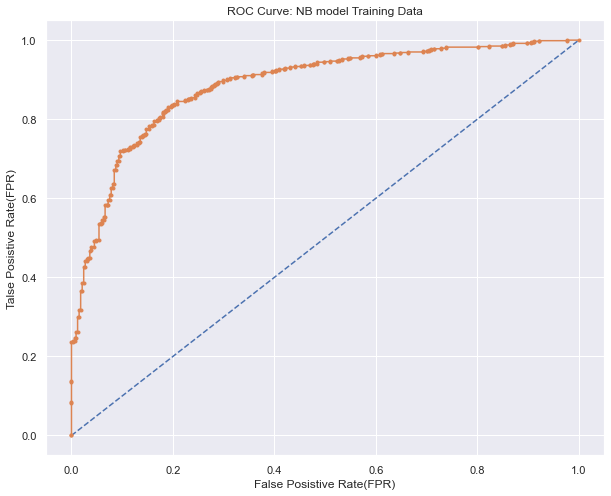

In [98]:
# Lets check the ROC_AUC score and ROC curve for training data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,nb_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: NB model Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for NB model on training data is {}'.format(roc_auc_score(y_train,nb_model.predict_proba(X_train)[:,1])))

In [99]:
# Lets check the classification report for NB model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [100]:
# Store the classification report of training data for NB Model into a dataframe
nb_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
nb_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.736,0.876,0.833,0.806,0.832
recall,0.723,0.883,0.833,0.803,0.833
f1-score,0.729,0.879,0.833,0.804,0.833
support,332.000,735.000,0.833,1067.000,1067.000


In [101]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
nb_train_metrics = [nb_train_report.iloc[0,2], #accuracy
                    nb_train_report.iloc[0,1], # precision 
                    nb_train_report.iloc[1,1], # recall 
                    nb_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,nb_model.predict_proba(X_train)[:,1]),3)] # roc_auc_score
nb_train_metrics

[0.833, 0.876, 0.883, 0.879, 0.886]

In [102]:
# Lets create a dataframe to compare test and training model metrics of NB model.

model_comparison['NB_training'] = nb_train_metrics
model_comparison

,LGR_training,LGR_test,LDA_training,LDA_test,KNN_training,KNN_testing,NB_training
accuracy,0.841,0.823,0.837,0.819,0.862,0.828,0.833
precision,0.867,0.866,0.870,0.868,0.886,0.878,0.876
recall,0.907,0.890,0.898,0.881,0.918,0.881,0.883
f1-score,0.887,0.878,0.884,0.874,0.902,0.880,0.879
roc_auc_score,0.890,0.883,0.889,0.884,0.930,0.868,0.886


In [103]:
# Let us first check NB performance on testing set
print('The accuracy of NB model on testing set is {}'.format(nb_model.score(X_test,y_test)))

The accuracy of NB model on testing set is 0.8253275109170306


In [104]:
# Let us check the confusion matrix for testing data
y_test_predict = nb_model.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  94                  36
Actual Positive                  44                 284


The ROC_AUC score for KNN model on testing data is 0.8845450281425891


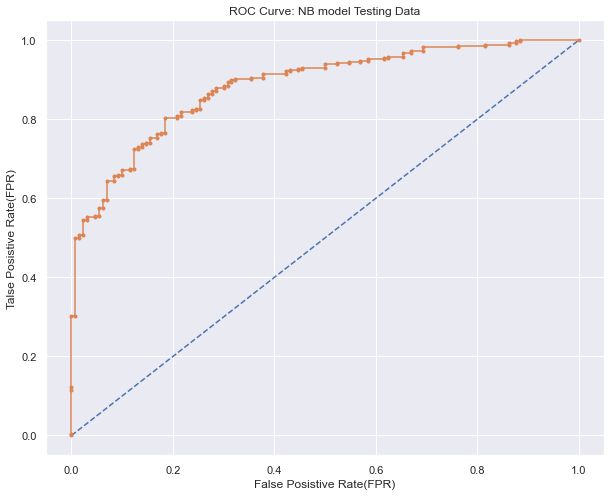

In [105]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,nb_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: NB model Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for KNN model on testing data is {}'.format(roc_auc_score(y_test,nb_model.predict_proba(X_test)[:,1])))

In [106]:
# Lets check the classification report for NB model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [107]:
# Store the classification report of testing data for NB Model into a dataframe
nb_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
nb_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.681,0.888,0.825,0.784,0.829
recall,0.723,0.866,0.825,0.794,0.825
f1-score,0.701,0.877,0.825,0.789,0.827
support,130.000,328.000,0.825,458.000,458.000


In [108]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
nb_test_metrics = [nb_test_report.iloc[0,2], #accuracy
                   nb_test_report.iloc[0,1], # precision 
                   nb_test_report.iloc[1,1], # recall 
                   nb_test_report.iloc[2,1], # f1-score 
                   round(roc_auc_score(y_test,nb_model.predict_proba(X_test)[:,1]),3)] # roc_auc_score
nb_test_metrics

[0.825, 0.888, 0.866, 0.877, 0.885]

In [109]:
# Lets create a dataframe to compare test and training model metrics of NB model.

model_comparison['NB_testing'] = nb_test_metrics
model_comparison.iloc[:,-4:]

,KNN_training,KNN_testing,NB_training,NB_testing
accuracy,0.862,0.828,0.833,0.825
precision,0.886,0.878,0.876,0.888
recall,0.918,0.881,0.883,0.866
f1-score,0.902,0.880,0.879,0.877
roc_auc_score,0.930,0.868,0.886,0.885


In [110]:
model_comparison

,LGR_training,LGR_test,LDA_training,LDA_test,KNN_training,KNN_testing,NB_training,NB_testing
accuracy,0.841,0.823,0.837,0.819,0.862,0.828,0.833,0.825
precision,0.867,0.866,0.870,0.868,0.886,0.878,0.876,0.888
recall,0.907,0.890,0.898,0.881,0.918,0.881,0.883,0.866
f1-score,0.887,0.878,0.884,0.874,0.902,0.880,0.879,0.877
roc_auc_score,0.890,0.883,0.889,0.884,0.930,0.868,0.886,0.885


## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Lets first apply gridsearch on the 4 models - Logistic Regression, Linear Discriminant Analysis & KNN.

### Logistic Regression

In [111]:
# Lets use grid searchcv to see if the Logistic Regression model improves with different input parameters
lgr_gscv =LogisticRegression(random_state = 1)

param_grid = { 'solver' :['liblinear','lbfgs'],
               'tol' : [0.01,0.0001,0.00001,0.000001],
               'max_iter' : [100,1000,10000]
                }

grid_search = GridSearchCV(estimator = lgr_gscv,param_grid=param_grid,cv =10);
grid_search.fit(X_train,y_train);
grid_search.best_params_

{'max_iter': 100, 'solver': 'lbfgs', 'tol': 0.01}

In [112]:
# We will use the above best parameters to tune the model further:
param_grid = { 'solver' :['liblinear','lbfgs'],
               'tol' : [0.1,0.01,0.02],
               'max_iter' : [25,50,100,125]
                }

grid_search = GridSearchCV(estimator = lgr_gscv,param_grid=param_grid,cv =10);
grid_search.fit(X_train,y_train);
grid_search.best_params_

{'max_iter': 25, 'solver': 'liblinear', 'tol': 0.1}

In [113]:
# Lets save the best estimator of grid search.
lgr_gscv = grid_search.best_estimator_
lgr_gscv

LogisticRegression(max_iter=25, random_state=1, solver='liblinear', tol=0.1)

In [114]:
# Let us first check Logistic Regression model performance on training set
print('The accuracy of Logistic Regression model tuned by Gridsearch on training set is {}'.format(lgr_gscv.score(X_train,y_train)))

The accuracy of Logistic Regression model tuned by Gridsearch on training set is 0.8406747891283973


In [115]:
# Let us first check Logistic Regression model performance on testing set
print('The accuracy of Logistic Regression model tuned by Gridsearch on testing set is {}'.format(lgr_gscv.score(X_test,y_test)))

The accuracy of Logistic Regression model tuned by Gridsearch on testing set is 0.8231441048034934


In [116]:
print ('Feature importance for Logistic regression is given below:')
for idx,col_name in enumerate(X_train.columns):
    print(' {} \t - {}'.format(lgr_gscv.coef_[0][idx],col_name))

Feature importance for Logistic regression is given below:
 -0.313267418970713 	 - age
 0.28825865568692255 	 - economic_cond_national
 0.14658071356649433 	 - economic_cond_household
 0.6564944219921978 	 - Blair
 -0.9961637554222513 	 - Hague
 -0.7582630816161188 	 - Europe
 -0.5081892930657597 	 - political_knowledge
 0.31199400844733166 	 - gender_male


### Linear Discriminant Analysis (LDA)

In [117]:
# Lets use grid searchcv to see if the model improves with different input parameters
lda_gscv = LinearDiscriminantAnalysis()

param_grid = { 'solver' :['svd', 'lsqr', 'eigen'],
               'tol' : [0.0001,0.00001,0.000001]
                }

grid_search = GridSearchCV(estimator = lda_gscv,param_grid=param_grid,cv =10)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [118]:
# We will use the above best parameters to tune the model further:
param_grid = { 'solver' :['svd', 'lsqr', 'eigen'],
               'tol' : [0.1,0.001,0.0001]
                }

grid_search = GridSearchCV(estimator = lda_gscv,param_grid=param_grid,cv =10)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'solver': 'svd', 'tol': 0.1}

In [119]:
# Lets save the best estimator of grid search.
lda_gscv = grid_search.best_estimator_
lda_gscv

LinearDiscriminantAnalysis(tol=0.1)

In [120]:
# Let us first check LDA model performance on training set
print('The accuracy of LDA model tuned by Gridsearch on training set is {}'.format(lda_gscv.score(X_train,y_train)))

The accuracy of LDA model tuned by Gridsearch on training set is 0.8369259606373008


In [121]:
# Let us first check LDA model performance on testing set
print('The accuracy of LDA model tuned by Gridsearch on testing set is {}'.format(lda_gscv.score(X_test,y_test)))

The accuracy of LDA model tuned by Gridsearch on testing set is 0.8187772925764192


In [122]:
print ('Feature importance for LDA is given below:')
for idx,col_name in enumerate(X_train.columns):
    print(' {} \t - {}'.format(lda_gscv.coef_[0][idx],col_name))

Feature importance for LDA is given below:
 -0.4024161533157774 	 - age
 0.30753959867216996 	 - economic_cond_national
 0.13976946079108915 	 - economic_cond_household
 0.8272978976208488 	 - Blair
 -1.1899310773813105 	 - Hague
 -0.8523424387828706 	 - Europe
 -0.6198241592817779 	 - political_knowledge
 0.249082025749122 	 - gender_male


### K-Nearest Neighbor (KNN)

In [123]:
# Lets use grid searchcv to see if the model improves with different input parameters
knn_gscv = KNeighborsClassifier()

param_grid = { 'weights' :['uniform', 'distance'],
               'n_neighbors' : [3,5,7,9,11,13]
                }

grid_search = GridSearchCV(estimator = knn_gscv,param_grid=param_grid,cv =10)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'n_neighbors': 13, 'weights': 'distance'}

In [124]:
# We will use the above best parameters to tune the model further:
param_grid = { 'weights' :['uniform', 'distance'],
               'n_neighbors' : [13,15,17,19,21,23]
                }

grid_search = GridSearchCV(estimator = knn_gscv,param_grid=param_grid,cv =10)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

In [125]:
# Lets save the best estimator of grid search.
knn_gscv = grid_search.best_estimator_
knn_gscv

KNeighborsClassifier(n_neighbors=15)

In [126]:
# Let us first check KNN model performance on training set
print('The accuracy of KNN model tuned by Gridsearch on training set is {}'.format(knn_gscv.score(X_train,y_train)))

The accuracy of KNN model tuned by Gridsearch on training set is 0.8359887535145267


In [127]:
# Let us first check KNN model performance on testing set
print('The accuracy of KNN model tuned by Gridsearch on testing set is {}'.format(knn_gscv.score(X_test,y_test)))

The accuracy of KNN model tuned by Gridsearch on testing set is 0.8253275109170306


### Bagging - Random Forest

In [128]:
# Lets use grid searchcv to see if the model improves with different input parameters
#We have ~1000 observations in training set. So, we can have ~1% of 1000, 10 as min_samples_leaf and 3 times 
#min_sample_leaf as min_samples_split, i.e., 30.

rf_model = RandomForestClassifier()

param_grid = { 'base_estimator__criterion' :['gini', 'entropy'],
               'base_estimator__min_samples_leaf' :[10,15,25],
               'base_estimator__min_samples_split' :[30,45,75],
               'base_estimator__max_depth' : [10,15,20]
                }
bag_gscv = BaggingClassifier(base_estimator=rf_model,random_state=1)

grid_search = GridSearchCV(estimator = bag_gscv,param_grid=param_grid,cv =5)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 10,
 'base_estimator__min_samples_leaf': 15,
 'base_estimator__min_samples_split': 30}

In [129]:
# Lets save the best estimator of grid search.
bag_gscv = grid_search.best_estimator_
bag_gscv

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        max_depth=10,
                                                        min_samples_leaf=15,
                                                        min_samples_split=30),
                  random_state=1)

In [130]:
# Let us first check Bagging model performance on training set
print('The accuracy of bagging model tuned by Gridsearch on training set is {}'.format(bag_gscv.score(X_train,y_train)))

The accuracy of bagging model tuned by Gridsearch on training set is 0.8416119962511716


In [131]:
# Let us first check Bagging model performance on testing set
print('The accuracy of bagging model tuned by Gridsearch on testing set is {}'.format(bag_gscv.score(X_test,y_test)))

The accuracy of bagging model tuned by Gridsearch on testing set is 0.8209606986899564


In [132]:
feature_importances = np.mean([bag.feature_importances_ for bag in bag_gscv.estimators_], axis=0)
feature_importances

array([0.0800746 , 0.07282381, 0.04397996, 0.18669994, 0.26320403,
       0.26688171, 0.07190993, 0.01442602])

In [133]:
print ('Feature importance for Bagging using Random Forest is given below:')
for idx,col_name in enumerate(X_train.columns):
    print(' {} \t - {}'.format(feature_importances[idx],col_name))

Feature importance for Bagging using Random Forest is given below:
 0.08007460022158616 	 - age
 0.07282380528052446 	 - economic_cond_national
 0.04397996392708402 	 - economic_cond_household
 0.18669993668053703 	 - Blair
 0.26320402863313364 	 - Hague
 0.26688171114726084 	 - Europe
 0.07190993299795667 	 - political_knowledge
 0.014426021111917247 	 - gender_male


### Boosting - Adaboost

In [134]:
# Lets use grid searchcv to see if the model improves with different input parameters
#We have ~1000 observations in training set. So, we can have ~1% of 1000, 10 as min_samples_leaf and 3 times 
#min_sample_leaf as min_samples_split, i.e., 30.

adb_gscv = AdaBoostClassifier(random_state=1)

param_grid = { 'algorithm' :['SAMME', 'SAMME.R'],
               'n_estimators' :[75,100,125]
                }

grid_search = GridSearchCV(estimator = adb_gscv,param_grid=param_grid,cv =5)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'algorithm': 'SAMME', 'n_estimators': 100}

In [135]:
# Lets save the best estimator of grid search.
adb_gscv = grid_search.best_estimator_
adb_gscv

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=1)

In [136]:
# Let us first check Adaboost model performance on training set
print('The accuracy of Adaboost model tuned by Gridsearch on training set is {}'.format(adb_gscv.score(X_train,y_train)))

The accuracy of Adaboost model tuned by Gridsearch on training set is 0.8481724461105904


In [137]:
# Let us first check Adaboost model performance on testing set
print('The accuracy of Adaboost model tuned by Gridsearch on testing set is {}'.format(adb_gscv.score(X_test,y_test)))

The accuracy of Adaboost model tuned by Gridsearch on testing set is 0.8144104803493449


In [138]:
feature_importances = np.mean([adb.feature_importances_ for adb in adb_gscv.estimators_], axis=0)
feature_importances

array([0.55, 0.04, 0.01, 0.18, 0.06, 0.13, 0.02, 0.01])

In [139]:
print ('Feature importance for Adaboost is given below:')
for idx,col_name in enumerate(X_train.columns):
    print(' {} \t - {}'.format(feature_importances[idx],col_name))

Feature importance for Adaboost is given below:
 0.55 	 - age
 0.04 	 - economic_cond_national
 0.01 	 - economic_cond_household
 0.18 	 - Blair
 0.06 	 - Hague
 0.13 	 - Europe
 0.02 	 - political_knowledge
 0.01 	 - gender_male


### Boosting - GradientBoosting

In [140]:
# Lets use grid searchcv to see if the model improves with different input parameters
#We have ~1000 observations in training set. So, we can have ~1% of 1000, 10 as min_samples_leaf and 3 times 
#min_sample_leaf as min_samples_split, i.e., 30.

gdb_gscv = GradientBoostingClassifier(random_state=1)

param_grid = { 'loss' :['deviance', 'exponential'],
               'criterion' :['friedman_mse', 'mse'],
               'min_samples_leaf' :[8,10,12],
               'min_samples_split' :[25,30,35],
               'max_depth' : [5,10,15]
                }

grid_search = GridSearchCV(estimator = gdb_gscv,param_grid=param_grid,cv =5)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'friedman_mse',
 'loss': 'exponential',
 'max_depth': 5,
 'min_samples_leaf': 12,
 'min_samples_split': 35}

In [141]:
# Lets save the best estimator of grid search.
gdb_gscv = grid_search.best_estimator_
gdb_gscv

GradientBoostingClassifier(loss='exponential', max_depth=5, min_samples_leaf=12,
                           min_samples_split=35, random_state=1)

In [142]:
# Let us first check Gradient boosting model performance on training set
print('The accuracy of Gradient boosting model tuned by Gridsearch on training set is {}'.format(gdb_gscv.score(X_train,y_train)))

The accuracy of Gradient boosting model tuned by Gridsearch on training set is 0.9268978444236177


In [143]:
# Let us first check Adaboost model performance on testing set
print('The accuracy of Gradient boosting model tuned by Gridsearch on testing set is {}'.format(gdb_gscv.score(X_test,y_test)))

The accuracy of Gradient boosting model tuned by Gridsearch on testing set is 0.8231441048034934


In [144]:
gdb_gscv.feature_importances_
print ('Feature importance for gradient boosting is given below:')
for idx,col_name in enumerate(X_train.columns):
    print(' {} \t - {}'.format(gdb_gscv.feature_importances_[idx],col_name))

Feature importance for gradient boosting is given below:
 0.15315272657395487 	 - age
 0.041393920650746166 	 - economic_cond_national
 0.035583688025434546 	 - economic_cond_household
 0.13320760683876115 	 - Blair
 0.31271288647368606 	 - Hague
 0.19913158040054554 	 - Europe
 0.11105107510232969 	 - political_knowledge
 0.013766515934541985 	 - gender_male


## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

### We will check the parameters for all the models run with Gridsearch and create performance comparison table, model_gscv 

### Performance metrics of Logistic regression with Gridsearchcv tuning.

In [145]:
# Let us first check Logistic regression performance on training set
print('The accuracy of Logistic regression model on training set is {}'.format(lgr_gscv.score(X_train,y_train)))

The accuracy of Logistic regression model on training set is 0.8406747891283973


In [146]:
# Let us check the confusion matrix for training data
y_train_predict = lgr_gscv.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 230                 102
Actual Positive                  68                 667


The ROC_AUC score for Logistic Regression model (Gridsearch) on training data is 0.8893389886074912


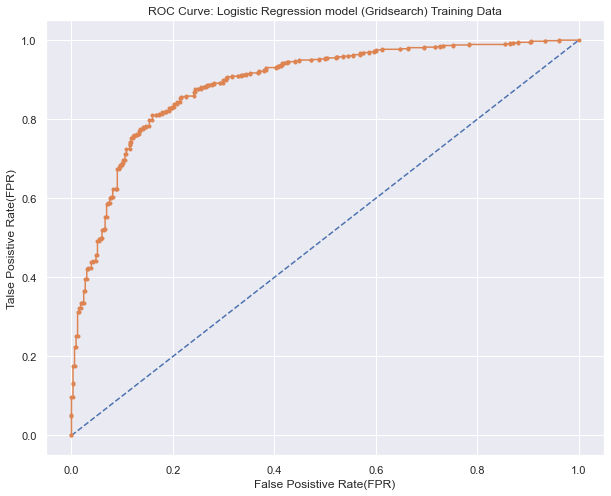

In [147]:
# Lets check the ROC_AUC score and ROC curve for traing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,lgr_gscv.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Logistic Regression model (Gridsearch) Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Logistic Regression model (Gridsearch) on training data is {}'.format(roc_auc_score(y_train,lgr_gscv.predict_proba(X_train)[:,1])))

In [148]:
# Lets check the classification report for logistic regression model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [149]:
# Store the classification report of training data for logistic regression Model into a dataframe
lgr_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
lgr_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.772,0.867,0.841,0.820,0.838
recall,0.693,0.907,0.841,0.800,0.841
f1-score,0.730,0.887,0.841,0.809,0.838
support,332.000,735.000,0.841,1067.000,1067.000


In [150]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lgr_train_metrics = [lgr_train_report.iloc[0,2], #accuracy
                    lgr_train_report.iloc[0,1], # precision 
                    lgr_train_report.iloc[1,1], # recall 
                    lgr_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,lgr_gscv.predict_proba(X_train)[:,1]),3)] # roc_auc_score
lgr_train_metrics

[0.841, 0.867, 0.907, 0.887, 0.889]

In [151]:
# Lets create a dataframe to compare test and training model metrics of Logistic Regression model.
model_gscv = pd.DataFrame(lgr_train_metrics,index = ['accuracy','precision','recall','f1-score','roc_auc_score'],
                            columns=['LGR_train'])
model_gscv['LGR_train'] = lgr_train_metrics
model_gscv

,LGR_train
accuracy,0.841
precision,0.867
recall,0.907
f1-score,0.887
roc_auc_score,0.889


In [152]:
# Let us first check Logistic regression performance on testing set
print('The accuracy of Logistic regression model on testing set is {}'.format(lgr_gscv.score(X_test,y_test)))

The accuracy of Logistic regression model on testing set is 0.8231441048034934


In [153]:
# Let us check the confusion matrix for testing data
y_test_predict = lgr_gscv.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  85                  45
Actual Positive                  36                 292


The ROC_AUC score for Logistic Regression model (Gridsearch) on testing data is 0.8820825515947467


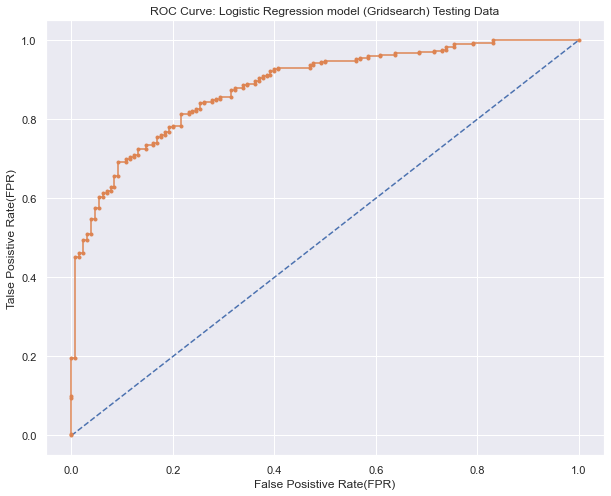

In [154]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,lgr_gscv.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Logistic Regression model (Gridsearch) Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Logistic Regression model (Gridsearch) on testing data is {}'.format(roc_auc_score(y_test,lgr_gscv.predict_proba(X_test)[:,1])))

In [155]:
# Lets check the classification report for logistic regression model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [156]:
# Store the classification report of testing data for logistic regression Model into a dataframe
lgr_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
lgr_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.702,0.866,0.823,0.784,0.820
recall,0.654,0.890,0.823,0.772,0.823
f1-score,0.677,0.878,0.823,0.778,0.821
support,130.000,328.000,0.823,458.000,458.000


In [157]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
lgr_test_metrics = [lgr_test_report.iloc[0,2], #accuracy
                    lgr_test_report.iloc[0,1], # precision 
                    lgr_test_report.iloc[1,1], # recall 
                    lgr_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test,lgr_gscv.predict_proba(X_test)[:,1]),3)] # roc_auc_score
lgr_test_metrics

[0.823, 0.866, 0.89, 0.878, 0.882]

In [158]:
# Lets store test model metrics of Logistic Regression model.

model_gscv['LGR_test'] = lgr_test_metrics
model_gscv

,LGR_train,LGR_test
accuracy,0.841,0.823
precision,0.867,0.866
recall,0.907,0.890
f1-score,0.887,0.878
roc_auc_score,0.889,0.882


### Performance metrics of Linear Discriminant Analysis (LDA) with Gridsearchcv tuning.

In [159]:
# Let us first check LDA performance on training set
print('The accuracy of LDA model on training set is {}'.format(lda_gscv.score(X_train,y_train)))

The accuracy of LDA model on training set is 0.8369259606373008


In [160]:
# Let us check the confusion matrix for training data
y_train_predict = lda_gscv.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 233                  99
Actual Positive                  75                 660


The ROC_AUC score for LDA model (Gridsearch) on training data is 0.8892242439144332


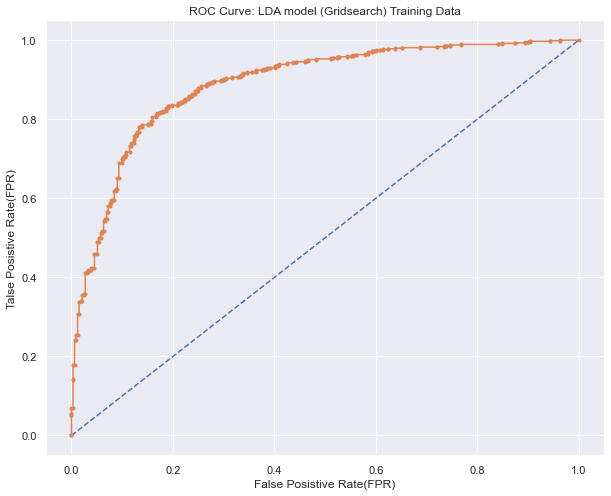

In [161]:
# Lets check the ROC_AUC score and ROC curve for traing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,lda_gscv.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: LDA model (Gridsearch) Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LDA model (Gridsearch) on training data is {}'.format(roc_auc_score(y_train,lda_gscv.predict_proba(X_train)[:,1])))

In [162]:
# Lets check the classification report for LDA model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [163]:
# Store the classification report of training data for LDA Model into a dataframe
lda_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
lda_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.756,0.870,0.837,0.813,0.834
recall,0.702,0.898,0.837,0.800,0.837
f1-score,0.728,0.884,0.837,0.806,0.835
support,332.000,735.000,0.837,1067.000,1067.000


In [164]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lda_train_metrics = [lda_train_report.iloc[0,2], #accuracy
                    lda_train_report.iloc[0,1], # precision 
                    lda_train_report.iloc[1,1], # recall 
                    lda_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,lda_gscv.predict_proba(X_train)[:,1]),3)] # roc_auc_score
lda_train_metrics

[0.837, 0.87, 0.898, 0.884, 0.889]

In [165]:
# Lets create a dataframe to compare test and training model metrics of LDA model.
model_gscv['LDA_train'] = lda_train_metrics
model_gscv

,LGR_train,LGR_test,LDA_train
accuracy,0.841,0.823,0.837
precision,0.867,0.866,0.870
recall,0.907,0.890,0.898
f1-score,0.887,0.878,0.884
roc_auc_score,0.889,0.882,0.889


In [166]:
# Let us first check LDA performance on testing set
print('The accuracy of LDA model on testing set is {}'.format(lda_gscv.score(X_test,y_test)))

The accuracy of LDA model on testing set is 0.8187772925764192


In [167]:
# Let us check the confusion matrix for testing data
y_test_predict = lda_gscv.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  86                  44
Actual Positive                  39                 289


The ROC_AUC score for LDA model (Gridsearch) on testing data is 0.8837711069418386


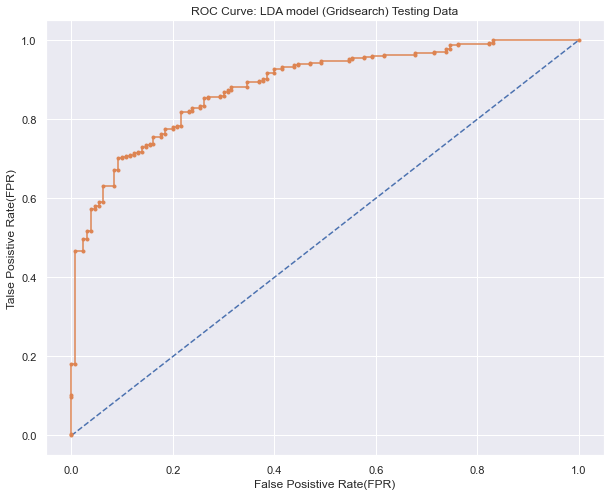

In [168]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,lda_gscv.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: LDA model (Gridsearch) Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LDA model (Gridsearch) on testing data is {}'.format(roc_auc_score(y_test,lda_gscv.predict_proba(X_test)[:,1])))

In [169]:
# Lets check the classification report for LDA model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [170]:
# Store the classification report of testing data for LDA Model into a dataframe
lda_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
lda_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.688,0.868,0.819,0.778,0.817
recall,0.662,0.881,0.819,0.771,0.819
f1-score,0.675,0.874,0.819,0.774,0.818
support,130.000,328.000,0.819,458.000,458.000


In [171]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
lda_test_metrics = [lda_test_report.iloc[0,2], #accuracy
                    lda_test_report.iloc[0,1], # precision 
                    lda_test_report.iloc[1,1], # recall 
                    lda_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test,lda_gscv.predict_proba(X_test)[:,1]),3)] # roc_auc_score
lda_test_metrics

[0.819, 0.868, 0.881, 0.874, 0.884]

In [172]:
# Lets store test model metrics of LDA model.

model_gscv['LDA_test'] = lda_test_metrics
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test
accuracy,0.841,0.823,0.837,0.819
precision,0.867,0.866,0.870,0.868
recall,0.907,0.890,0.898,0.881
f1-score,0.887,0.878,0.884,0.874
roc_auc_score,0.889,0.882,0.889,0.884


### Performance metrics of K-Nearest Neighbors (KNN) with Gridsearchcv tuning.

In [173]:
# Let us first check KNN performance on training set
print('The accuracy of KNN model on training set is {}'.format(knn_gscv.score(X_train,y_train)))

The accuracy of KNN model on training set is 0.8359887535145267


In [174]:
# Let us check the confusion matrix for training data
y_train_predict = knn_gscv.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 228                 104
Actual Positive                  71                 664


The ROC_AUC score for KNN model (Gridsearch) on training data is 0.9071346610933531


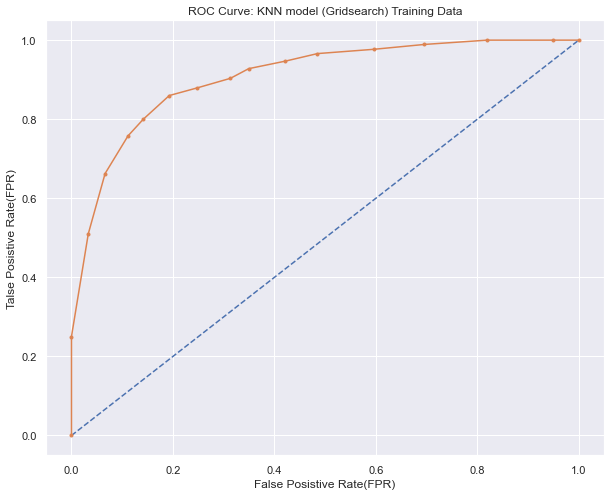

In [175]:
# Lets check the ROC_AUC score and ROC curve for traing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,knn_gscv.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: KNN model (Gridsearch) Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for KNN model (Gridsearch) on training data is {}'.format(roc_auc_score(y_train,knn_gscv.predict_proba(X_train)[:,1])))

In [176]:
# Lets check the classification report for KNN model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       332
           1       0.86      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [177]:
# Store the classification report of training data for KNN Model into a dataframe
knn_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
knn_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.763,0.865,0.836,0.814,0.833
recall,0.687,0.903,0.836,0.795,0.836
f1-score,0.723,0.884,0.836,0.803,0.834
support,332.000,735.000,0.836,1067.000,1067.000


In [178]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
knn_train_metrics = [knn_train_report.iloc[0,2], #accuracy
                    knn_train_report.iloc[0,1], # precision 
                    knn_train_report.iloc[1,1], # recall 
                    knn_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,knn_gscv.predict_proba(X_train)[:,1]),3)] # roc_auc_score
knn_train_metrics

[0.836, 0.865, 0.903, 0.884, 0.907]

In [179]:
# Lets create a dataframe to compare test and training model metrics of KNN model.
model_gscv['KNN_train'] = knn_train_metrics
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test,KNN_train
accuracy,0.841,0.823,0.837,0.819,0.836
precision,0.867,0.866,0.870,0.868,0.865
recall,0.907,0.890,0.898,0.881,0.903
f1-score,0.887,0.878,0.884,0.874,0.884
roc_auc_score,0.889,0.882,0.889,0.884,0.907


In [180]:
# Let us first check KNN performance on testing set
print('The accuracy of KNN model on testing set is {}'.format(knn_gscv.score(X_test,y_test)))

The accuracy of KNN model on testing set is 0.8253275109170306


In [181]:
# Let us check the confusion matrix for testing data
y_test_predict = knn_gscv.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  89                  41
Actual Positive                  39                 289


The ROC_AUC score for KNN model (Gridsearch) on testing data is 0.89375


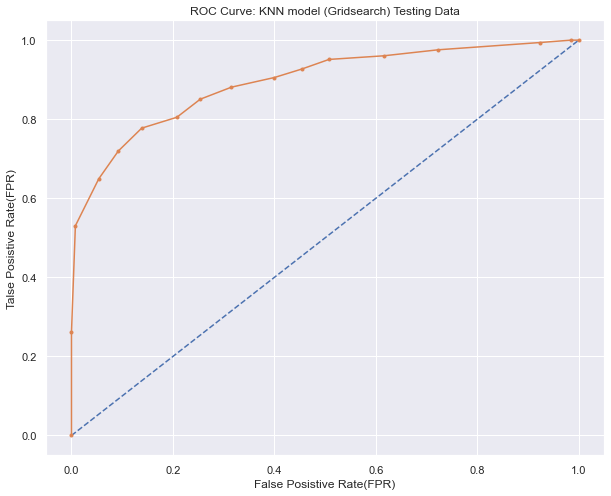

In [182]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,knn_gscv.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: KNN model (Gridsearch) Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for KNN model (Gridsearch) on testing data is {}'.format(roc_auc_score(y_test,knn_gscv.predict_proba(X_test)[:,1])))

In [183]:
# Lets check the classification report for KNN model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.82       458



In [184]:
# Store the classification report of testing data for KNN Model into a dataframe
knn_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
knn_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.695,0.876,0.825,0.786,0.825
recall,0.685,0.881,0.825,0.783,0.825
f1-score,0.690,0.878,0.825,0.784,0.825
support,130.000,328.000,0.825,458.000,458.000


In [185]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
knn_test_metrics = [knn_test_report.iloc[0,2], #accuracy
                    knn_test_report.iloc[0,1], # precision 
                    knn_test_report.iloc[1,1], # recall 
                    knn_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test,knn_gscv.predict_proba(X_test)[:,1]),3)] # roc_auc_score
knn_test_metrics

[0.825, 0.876, 0.881, 0.878, 0.894]

In [186]:
# Lets store test model metrics of KNN model.

model_gscv['KNN_test'] = knn_test_metrics
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test,KNN_train,KNN_test
accuracy,0.841,0.823,0.837,0.819,0.836,0.825
precision,0.867,0.866,0.870,0.868,0.865,0.876
recall,0.907,0.890,0.898,0.881,0.903,0.881
f1-score,0.887,0.878,0.884,0.874,0.884,0.878
roc_auc_score,0.889,0.882,0.889,0.884,0.907,0.894


In [187]:
# For NAive Bayes, as we dont have any modifiable hyper parameters, we will use the same naive bayes model performance metrics 
# created in section 1.5
model_gscv['NB_train'] = model_comparison['NB_training']
model_gscv['NB_test'] = model_comparison['NB_testing']
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test,KNN_train,KNN_test,NB_train,NB_test
accuracy,0.841,0.823,0.837,0.819,0.836,0.825,0.833,0.825
precision,0.867,0.866,0.870,0.868,0.865,0.876,0.876,0.888
recall,0.907,0.890,0.898,0.881,0.903,0.881,0.883,0.866
f1-score,0.887,0.878,0.884,0.874,0.884,0.878,0.879,0.877
roc_auc_score,0.889,0.882,0.889,0.884,0.907,0.894,0.886,0.885


### Performance metrics of Bagging with Random Forest with Gridsearchcv tuning.

In [188]:
# Let us first check Bagging performance on training set
print('The accuracy of Bagging model on training set is {}'.format(bag_gscv.score(X_train,y_train)))

The accuracy of Bagging model on training set is 0.8416119962511716


In [189]:
# Let us check the confusion matrix for training data
y_train_predict = bag_gscv.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 211                 121
Actual Positive                  48                 687


The ROC_AUC score for bagging model (Gridsearch) on training data is 0.9078046881403162


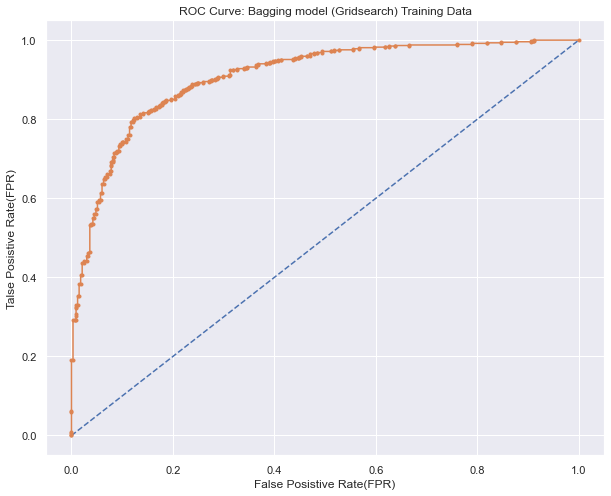

In [190]:
# Lets check the ROC_AUC score and ROC curve for traing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,bag_gscv.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Bagging model (Gridsearch) Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for bagging model (Gridsearch) on training data is {}'.format(roc_auc_score(y_train,bag_gscv.predict_proba(X_train)[:,1])))

In [191]:
# Lets check the classification report for bagging model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71       332
           1       0.85      0.93      0.89       735

    accuracy                           0.84      1067
   macro avg       0.83      0.79      0.80      1067
weighted avg       0.84      0.84      0.84      1067



In [192]:
# Store the classification report of training data for bagging Model into a dataframe
bag_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
bag_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.815,0.850,0.842,0.832,0.839
recall,0.636,0.935,0.842,0.785,0.842
f1-score,0.714,0.890,0.842,0.802,0.836
support,332.000,735.000,0.842,1067.000,1067.000


In [193]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
bag_train_metrics = [bag_train_report.iloc[0,2], #accuracy
                    bag_train_report.iloc[0,1], # precision 
                    bag_train_report.iloc[1,1], # recall 
                    bag_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,bag_gscv.predict_proba(X_train)[:,1]),3)] # roc_auc_score
bag_train_metrics

[0.842, 0.85, 0.935, 0.89, 0.908]

In [194]:
# Lets create a dataframe to compare test and training model metrics of bagging model.
model_gscv['BAG_train'] = bag_train_metrics
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test,KNN_train,KNN_test,NB_train,NB_test,BAG_train
accuracy,0.841,0.823,0.837,0.819,0.836,0.825,0.833,0.825,0.842
precision,0.867,0.866,0.870,0.868,0.865,0.876,0.876,0.888,0.850
recall,0.907,0.890,0.898,0.881,0.903,0.881,0.883,0.866,0.935
f1-score,0.887,0.878,0.884,0.874,0.884,0.878,0.879,0.877,0.890
roc_auc_score,0.889,0.882,0.889,0.884,0.907,0.894,0.886,0.885,0.908


In [195]:
# Let us first check bagging performance on testing set
print('The accuracy of bagging model on testing set is {}'.format(bag_gscv.score(X_test,y_test)))

The accuracy of bagging model on testing set is 0.8209606986899564


In [196]:
# Let us check the confusion matrix for testing data
y_test_predict = bag_gscv.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  80                  50
Actual Positive                  32                 296


The ROC_AUC score for bagging model (Gridsearch) on testing data is 0.8954268292682925


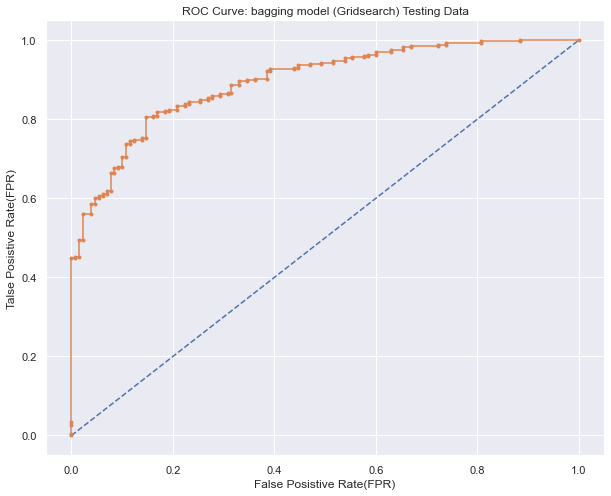

In [197]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,bag_gscv.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: bagging model (Gridsearch) Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for bagging model (Gridsearch) on testing data is {}'.format(roc_auc_score(y_test,bag_gscv.predict_proba(X_test)[:,1])))

In [198]:
# Lets check the classification report for bagging model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66       130
           1       0.86      0.90      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.76      0.77       458
weighted avg       0.82      0.82      0.82       458



In [199]:
# Store the classification report of testing data for bagging Model into a dataframe
bag_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
bag_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.714,0.855,0.821,0.785,0.815
recall,0.615,0.902,0.821,0.759,0.821
f1-score,0.661,0.878,0.821,0.770,0.817
support,130.000,328.000,0.821,458.000,458.000


In [200]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
bag_test_metrics = [bag_test_report.iloc[0,2], #accuracy
                    bag_test_report.iloc[0,1], # precision 
                    bag_test_report.iloc[1,1], # recall 
                    bag_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test,bag_gscv.predict_proba(X_test)[:,1]),3)] # roc_auc_score
bag_test_metrics

[0.821, 0.855, 0.902, 0.878, 0.895]

In [201]:
# Lets store test model metrics of bagging model.

model_gscv['BAG_test'] = bag_test_metrics
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test,KNN_train,KNN_test,NB_train,NB_test,BAG_train,BAG_test
accuracy,0.841,0.823,0.837,0.819,0.836,0.825,0.833,0.825,0.842,0.821
precision,0.867,0.866,0.870,0.868,0.865,0.876,0.876,0.888,0.850,0.855
recall,0.907,0.890,0.898,0.881,0.903,0.881,0.883,0.866,0.935,0.902
f1-score,0.887,0.878,0.884,0.874,0.884,0.878,0.879,0.877,0.890,0.878
roc_auc_score,0.889,0.882,0.889,0.884,0.907,0.894,0.886,0.885,0.908,0.895


### Performance metrics of Boosting - Adaboost with Random Forest with Gridsearchcv tuning.

In [202]:
# Let us first check Boosting - Adaboost performance on training set
print('The accuracy of Boosting - Adaboost model on training set is {}'.format(adb_gscv.score(X_train,y_train)))

The accuracy of Boosting - Adaboost model on training set is 0.8481724461105904


In [203]:
# Let us check the confusion matrix for training data
y_train_predict = adb_gscv.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 234                  98
Actual Positive                  64                 671


The ROC_AUC score for Boosting - Adaboost model (Gridsearch) on training data is 0.9023850504057046


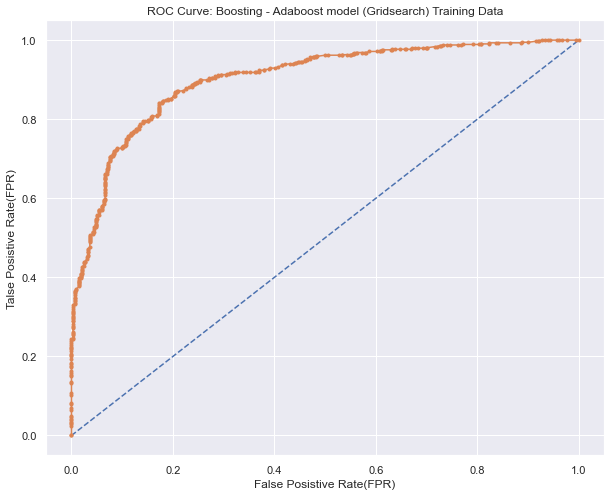

In [204]:
# Lets check the ROC_AUC score and ROC curve for traing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,adb_gscv.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Boosting - Adaboost model (Gridsearch) Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Boosting - Adaboost model (Gridsearch) on training data is {}'.format(roc_auc_score(y_train,adb_gscv.predict_proba(X_train)[:,1])))

In [205]:
# Lets check the classification report for Boosting - Adaboost model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [206]:
# Store the classification report of training data for Boosting - Adaboost Model into a dataframe
adb_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
adb_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.785,0.873,0.848,0.829,0.845
recall,0.705,0.913,0.848,0.809,0.848
f1-score,0.743,0.892,0.848,0.818,0.846
support,332.000,735.000,0.848,1067.000,1067.000


In [207]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
adb_train_metrics = [adb_train_report.iloc[0,2], #accuracy
                    adb_train_report.iloc[0,1], # precision 
                    adb_train_report.iloc[1,1], # recall 
                    adb_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,adb_gscv.predict_proba(X_train)[:,1]),3)] # roc_auc_score
adb_train_metrics

[0.848, 0.873, 0.913, 0.892, 0.902]

In [208]:
# Lets create a dataframe to compare test and training model metrics of Boosting - Adaboost model.
model_gscv['ADB_train'] = adb_train_metrics
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test,KNN_train,KNN_test,NB_train,NB_test,BAG_train,BAG_test,ADB_train
accuracy,0.841,0.823,0.837,0.819,0.836,0.825,0.833,0.825,0.842,0.821,0.848
precision,0.867,0.866,0.870,0.868,0.865,0.876,0.876,0.888,0.850,0.855,0.873
recall,0.907,0.890,0.898,0.881,0.903,0.881,0.883,0.866,0.935,0.902,0.913
f1-score,0.887,0.878,0.884,0.874,0.884,0.878,0.879,0.877,0.890,0.878,0.892
roc_auc_score,0.889,0.882,0.889,0.884,0.907,0.894,0.886,0.885,0.908,0.895,0.902


In [209]:
# Let us first check Boosting - Adaboost performance on testing set
print('The accuracy of Boosting - Adaboost model on testing set is {}'.format(adb_gscv.score(X_test,y_test)))

The accuracy of Boosting - Adaboost model on testing set is 0.8144104803493449


In [210]:
# Let us check the confusion matrix for testing data
y_test_predict = adb_gscv.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  85                  45
Actual Positive                  40                 288


The ROC_AUC score for Boosting - Adaboost model (Gridsearch) on testing data is 0.8851430581613507


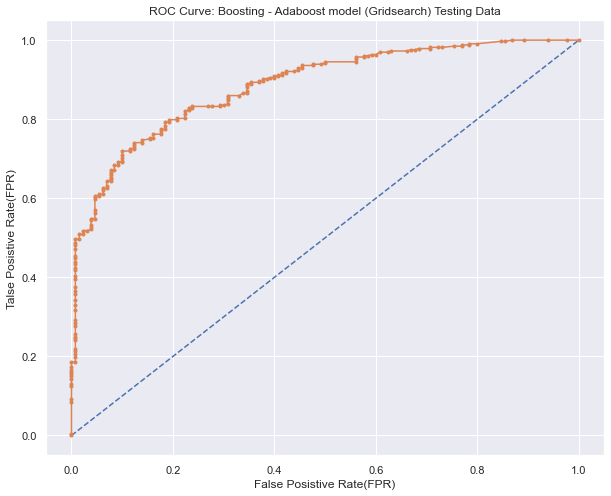

In [211]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,adb_gscv.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Boosting - Adaboost model (Gridsearch) Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Boosting - Adaboost model (Gridsearch) on testing data is {}'.format(roc_auc_score(y_test,adb_gscv.predict_proba(X_test)[:,1])))

In [212]:
# Lets check the classification report for Boosting - Adaboost model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



In [213]:
# Store the classification report of testing data for Boosting - Adaboost Model into a dataframe
adb_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
adb_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.680,0.865,0.814,0.772,0.812
recall,0.654,0.878,0.814,0.766,0.814
f1-score,0.667,0.871,0.814,0.769,0.813
support,130.000,328.000,0.814,458.000,458.000


In [214]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
adb_test_metrics = [adb_test_report.iloc[0,2], #accuracy
                    adb_test_report.iloc[0,1], # precision 
                    adb_test_report.iloc[1,1], # recall 
                    adb_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test,adb_gscv.predict_proba(X_test)[:,1]),3)] # roc_auc_score
adb_test_metrics

[0.814, 0.865, 0.878, 0.871, 0.885]

In [215]:
# Lets store test model metrics of Boosting - Adaboost model.

model_gscv['ADB_test'] = adb_test_metrics
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test,KNN_train,KNN_test,NB_train,NB_test,BAG_train,BAG_test,ADB_train,ADB_test
accuracy,0.841,0.823,0.837,0.819,0.836,0.825,0.833,0.825,0.842,0.821,0.848,0.814
precision,0.867,0.866,0.870,0.868,0.865,0.876,0.876,0.888,0.850,0.855,0.873,0.865
recall,0.907,0.890,0.898,0.881,0.903,0.881,0.883,0.866,0.935,0.902,0.913,0.878
f1-score,0.887,0.878,0.884,0.874,0.884,0.878,0.879,0.877,0.890,0.878,0.892,0.871
roc_auc_score,0.889,0.882,0.889,0.884,0.907,0.894,0.886,0.885,0.908,0.895,0.902,0.885


### Performance metrics of Gradient Boosting with Gridsearchcv tuning.

In [216]:
# Let us first check Gradient Boosting performance on training set
print('The accuracy of Gradient Boosting model on training set is {}'.format(gdb_gscv.score(X_train,y_train)))

The accuracy of Gradient Boosting model on training set is 0.9268978444236177


In [217]:
# Let us check the confusion matrix for training data
y_train_predict = gdb_gscv.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 281                  51
Actual Positive                  27                 708


The ROC_AUC score for Gradient Boosting model (Gridsearch) on training data is 0.9809175477419884


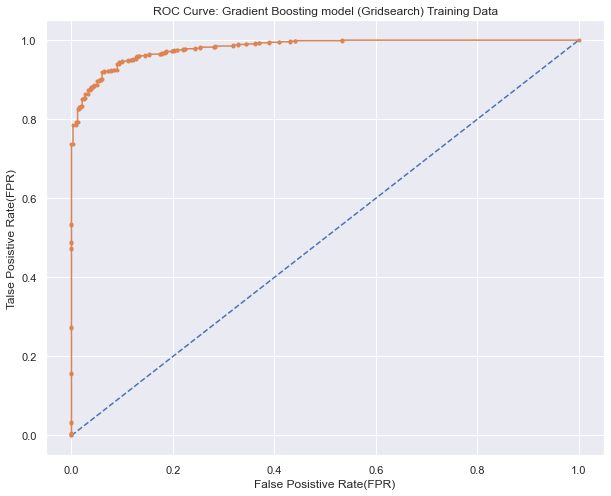

In [218]:
# Lets check the ROC_AUC score and ROC curve for traing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,gdb_gscv.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Gradient Boosting model (Gridsearch) Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Gradient Boosting model (Gridsearch) on training data is {}'.format(roc_auc_score(y_train,gdb_gscv.predict_proba(X_train)[:,1])))

In [219]:
# Lets check the classification report for Gradient Boosting model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       332
           1       0.93      0.96      0.95       735

    accuracy                           0.93      1067
   macro avg       0.92      0.90      0.91      1067
weighted avg       0.93      0.93      0.93      1067



In [220]:
# Store the classification report of training data for Gradient Boosting Model into a dataframe
gdb_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
gdb_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.912,0.933,0.927,0.923,0.926
recall,0.846,0.963,0.927,0.905,0.927
f1-score,0.878,0.948,0.927,0.913,0.926
support,332.000,735.000,0.927,1067.000,1067.000


In [221]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
gdb_train_metrics = [gdb_train_report.iloc[0,2], #accuracy
                    gdb_train_report.iloc[0,1], # precision 
                    gdb_train_report.iloc[1,1], # recall 
                    gdb_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_train,gdb_gscv.predict_proba(X_train)[:,1]),3)] # roc_auc_score
gdb_train_metrics

[0.927, 0.933, 0.963, 0.948, 0.981]

In [222]:
# Lets create a dataframe to compare test and training model metrics of Gradient Boosting model.
model_gscv['GDB_train'] = gdb_train_metrics
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test,KNN_train,KNN_test,NB_train,NB_test,BAG_train,BAG_test,ADB_train,ADB_test,GDB_train
accuracy,0.841,0.823,0.837,0.819,0.836,0.825,0.833,0.825,0.842,0.821,0.848,0.814,0.927
precision,0.867,0.866,0.870,0.868,0.865,0.876,0.876,0.888,0.850,0.855,0.873,0.865,0.933
recall,0.907,0.890,0.898,0.881,0.903,0.881,0.883,0.866,0.935,0.902,0.913,0.878,0.963
f1-score,0.887,0.878,0.884,0.874,0.884,0.878,0.879,0.877,0.890,0.878,0.892,0.871,0.948
roc_auc_score,0.889,0.882,0.889,0.884,0.907,0.894,0.886,0.885,0.908,0.895,0.902,0.885,0.981


In [223]:
# Let us first check Gradient Boosting performance on testing set
print('The accuracy of Gradient Boosting model on testing set is {}'.format(gdb_gscv.score(X_test,y_test)))

The accuracy of Gradient Boosting model on testing set is 0.8231441048034934


In [224]:
# Let us check the confusion matrix for testing data
y_test_predict = gdb_gscv.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                  93                  37
Actual Positive                  44                 284


The ROC_AUC score for Gradient Boosting model (Gridsearch) on testing data is 0.8914165103189493


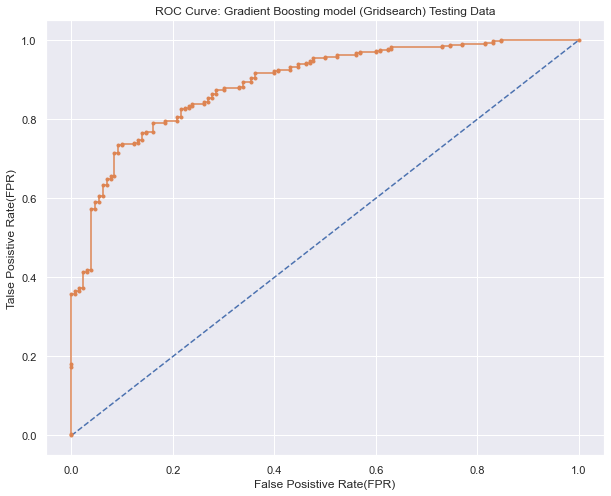

In [225]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,gdb_gscv.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Gradient Boosting model (Gridsearch) Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Gradient Boosting model (Gridsearch) on testing data is {}'.format(roc_auc_score(y_test,gdb_gscv.predict_proba(X_test)[:,1])))

In [226]:
# Lets check the classification report for Gradient Boosting model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.88      0.87      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [227]:
# Store the classification report of testing data for Gradient Boosting Model into a dataframe
gdb_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
gdb_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.679,0.885,0.823,0.782,0.826
recall,0.715,0.866,0.823,0.791,0.823
f1-score,0.697,0.875,0.823,0.786,0.825
support,130.000,328.000,0.823,458.000,458.000


In [228]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
gdb_test_metrics = [gdb_test_report.iloc[0,2], #accuracy
                    gdb_test_report.iloc[0,1], # precision 
                    gdb_test_report.iloc[1,1], # recall 
                    gdb_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test,gdb_gscv.predict_proba(X_test)[:,1]),3)] # roc_auc_score
gdb_test_metrics

[0.823, 0.885, 0.866, 0.875, 0.891]

In [229]:
# Lets store test model metrics of Gradient Boosting model.

model_gscv['GDB_test'] = gdb_test_metrics
model_gscv

,LGR_train,LGR_test,LDA_train,LDA_test,KNN_train,KNN_test,NB_train,NB_test,BAG_train,BAG_test,ADB_train,ADB_test,GDB_train,GDB_test
accuracy,0.841,0.823,0.837,0.819,0.836,0.825,0.833,0.825,0.842,0.821,0.848,0.814,0.927,0.823
precision,0.867,0.866,0.870,0.868,0.865,0.876,0.876,0.888,0.850,0.855,0.873,0.865,0.933,0.885
recall,0.907,0.890,0.898,0.881,0.903,0.881,0.883,0.866,0.935,0.902,0.913,0.878,0.963,0.866
f1-score,0.887,0.878,0.884,0.874,0.884,0.878,0.879,0.877,0.890,0.878,0.892,0.871,0.948,0.875
roc_auc_score,0.889,0.882,0.889,0.884,0.907,0.894,0.886,0.885,0.908,0.895,0.902,0.885,0.981,0.891


# Problem 2:

## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

## 1. President Franklin D. Roosevelt in 1941
## 2. President John F. Kennedy in 1961
## 3. President Richard Nixon in 1973

## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [230]:
## Importing the necessary libraries along with the standard import
import nltk # this is the Natural Language Tool Kit
import string # this is used for string manipulations 
from wordcloud import WordCloud # Word Cloud

In [231]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
roosevelt = inaugural.raw('1941-Roosevelt.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\soorej.balan\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [232]:
# Get the number of characters in each speech
print('No. of characters in Roosevelt\'s speech :', len(roosevelt))
print('No. of characters in Kennedy\'s speech :', len(kennedy))
print('No. of characters in Nixon\'s speech :', len(nixon))

# Get the number of words in each speech
print('No. of words in Roosevelt\'s speech :', len(nltk.word_tokenize(roosevelt)))
print('No. of words in Kennedy\'s speech :', len(nltk.word_tokenize(kennedy)))
print('No. of words in Nixon\'s speech :', len(nltk.word_tokenize(nixon)))

# Get the number of sentences in each speech
print('No. of sentences in Roosevelt\'s speech :', len(nltk.sent_tokenize(roosevelt)))
print('No. of sentences in Kennedy\'s speech :', len(nltk.sent_tokenize(kennedy)))
print('No. of sentences in Nixon\'s speech :', len(nltk.sent_tokenize(nixon)))

No. of characters in Roosevelt's speech : 7571
No. of characters in Kennedy's speech : 7618
No. of characters in Nixon's speech : 9991
No. of words in Roosevelt's speech : 1526
No. of words in Kennedy's speech : 1543
No. of words in Nixon's speech : 2006
No. of sentences in Roosevelt's speech : 68
No. of sentences in Kennedy's speech : 52
No. of sentences in Nixon's speech : 68


## 2,2 Remove all the stopwords from all three speeches.

In [233]:
# get all the stop words in english and punctuation
stop_words = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['--']
print('No. of stop words: ',len(stop_words))
print(stop_words[:5],list(string.punctuation)[:5])

No. of stop words:  212
['i', 'me', 'my', 'myself', 'we'] ['!', '"', '#', '$', '%']


In [234]:
# convert all words to lower case in all 3 speeches and check the words to be removed as per stop_words
roosevelt_words = (w.lower() for w in nltk.word_tokenize(roosevelt))
kennedy_words = (w.lower() for w in nltk.word_tokenize(kennedy))
nixon_words = (w.lower() for w in nltk.word_tokenize(nixon))
roosevelt_words_rmv = [words for words in roosevelt_words if words in stop_words]
kennedy_words_rmv = [words for words in kennedy_words if words in stop_words]
nixon_words_rmv = [words for words in nixon_words if words in stop_words]
print(roosevelt_words_rmv[:5],kennedy_words_rmv[:5],nixon_words_rmv[:5])
print('No. of words removed: \n ',len(roosevelt_words_rmv),' : Roosevelt\'s speech\n ',len(kennedy_words_rmv),' : Kennedy\'s speech\n',len(nixon_words_rmv),' : Nixon\'s speech')

['on', 'each', 'of', ',', 'the'] [',', ',', ',', ',', ','] [',', ',', ',', ',', ',']
No. of words removed: 
  894  : Roosevelt's speech
  847  : Kennedy's speech
 1158  : Nixon's speech


In [235]:
# convert the speech into list of words which does not have any of the stop words or punctuations
roosevelt_words = (w.lower() for w in nltk.word_tokenize(roosevelt))
kennedy_words = (w.lower() for w in nltk.word_tokenize(kennedy))
nixon_words = (w.lower() for w in nltk.word_tokenize(nixon))
roosevelt_words_clean = [words for words in roosevelt_words if words not in stop_words]
kennedy_words_clean = [words for words in kennedy_words if words not in stop_words]
nixon_words_clean = [words for words in nixon_words if words not in stop_words]
print(roosevelt_words_clean[:5],kennedy_words_clean[:5],nixon_words_clean[:5])
print('No. of words retained: \n',len(roosevelt_words_clean),' : Roosevelt\'s speech\n',len(kennedy_words_clean),' : Kennedy\'s speech\n',len(nixon_words_clean),' : Nixon\'s speech')

['national', 'day', 'inauguration', 'since', '1789'] ['vice', 'president', 'johnson', 'mr.', 'speaker'] ['mr.', 'vice', 'president', 'mr.', 'speaker']
No. of words retained: 
 632  : Roosevelt's speech
 696  : Kennedy's speech
 848  : Nixon's speech


## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [237]:
# we will use nltk's freqdist to get the words frequency 
roosevelt_words_freq = nltk.FreqDist(roosevelt_words_clean)
kennedy_words_freq = nltk.FreqDist(kennedy_words_clean)
nixon_words_freq = nltk.FreqDist(nixon_words_clean)

In [238]:
# Lets find the 3 most frequently occuring words in each speech
print('Top 3 words in each speech: ')
print('Roosevelt: ',roosevelt_words_freq.most_common(3))
print('Kennedy  : ',kennedy_words_freq.most_common(3))
print('Nixon    : ',nixon_words_freq.most_common(3))

Top 3 words in each speech: 
Roosevelt:  [('nation', 12), ('know', 10), ('spirit', 9)]
Kennedy  :  [('let', 16), ('us', 12), ('world', 8)]
Nixon    :  [('us', 26), ('let', 22), ('america', 21)]


## 2.4 Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud for Roosevelt's speech (after cleaning)!!


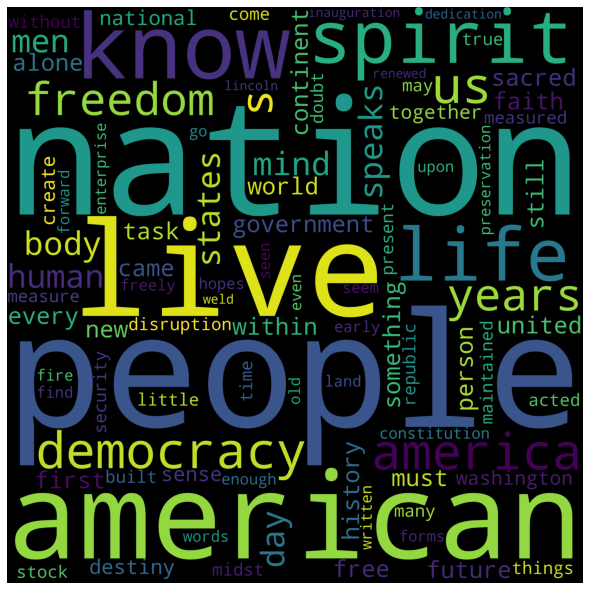

In [239]:
# Create word cloud for Roosevelt's speech
word_features = [item[0] for item in roosevelt_words_freq.most_common(100)]
wc_a = ' '.join(word_features)
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt's speech (after cleaning)!!")
plt.show()

Word Cloud for Kennedy's speech (after cleaning)!!


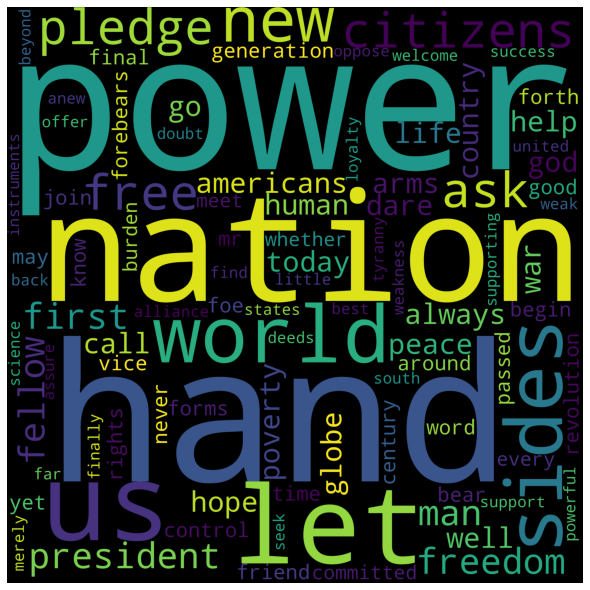

In [240]:
# Create word cloud for Kennedy's speech
word_features = [item[0] for item in kennedy_words_freq.most_common(100)]
wc_a = ' '.join(word_features)
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy's speech (after cleaning)!!")
plt.show()

Word Cloud for Nixon's speech (after cleaning)!!


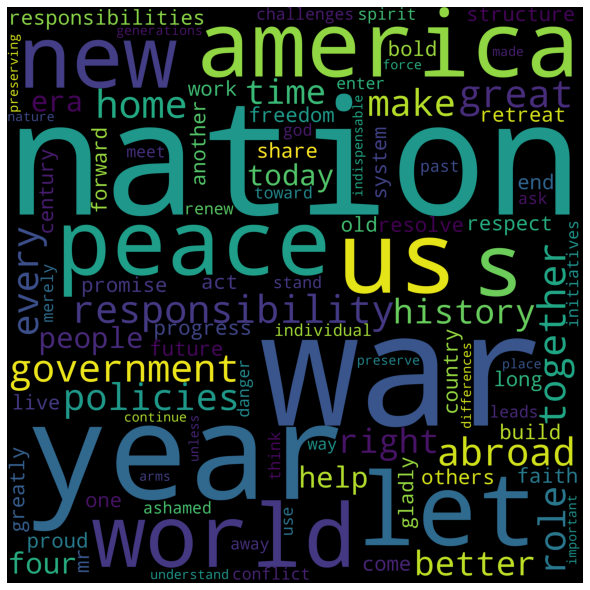

In [241]:
# Create word cloud for Nixon's speech
word_features = [item[0] for item in nixon_words_freq.most_common(100)]
wc_a = ' '.join(word_features)
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon's speech (after cleaning)!!")
plt.show()